# Introduction to Python for Biology
# Bonus Pandas and Data Viz

### Reading in trickier file types

This worked well above because we `.read_csv()` expected a comma-separated file with a header row. What happens when these don't match?

In [22]:
golf = pd.read_csv('data/playgolf.csv')

In [23]:
golf.head()

07-01-2014|sunny|85|85|false|Don't Play
0  07-02-2014|sunny|80|90|true|Don't Play
1    07-03-2014|overcast|83|78|false|Play
2        07-04-2014|rain|70|96|false|Play
3        07-05-2014|rain|68|80|false|Play
4   07-06-2014|rain|65|70|true|Don't Play

What happened here? Let's Google `pandas .read_csv` to look at the documentation and troubleshoot. 

In [24]:
golf = pd.read_csv('data/playgolf.csv', sep = '|')

In [25]:
golf.head()

07-01-2014     sunny  85  85.1  false  Don't Play
0  07-02-2014     sunny  80    90   True  Don't Play
1  07-03-2014  overcast  83    78  False        Play
2  07-04-2014      rain  70    96  False        Play
3  07-05-2014      rain  68    80  False        Play
4  07-06-2014      rain  65    70   True  Don't Play

We fixed part of the problem, but we still need pandas to understand we don't have a header in this file.

In [26]:
golf_cols = ["Date", "Outlook", "Temperature", "Humidity", "Windy", "Result"]
golf = pd.read_csv('data/playgolf.csv', sep = '|', header = None, names = golf_cols)

In [27]:
golf.head()

Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play

The `skiprows` and `skipfooter` arguments may also be useful if you have collaborators who make extra notes in their data files that you need to ignore.

## Pandas Indexing

#### Let's read in the drug dataset for practicing indexing

In [28]:
drug = pd.read_csv("data/drug.csv")
drug.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0               -  ...            0.1                24.5               0.2   
1             3.0  ...            0.1                41.0               0.3   
2               -  ...            0.4                 4.5               0.9   
3             9.5  ...            0.8                 3.0               2.0   
4             1.0  ...            1.1                 4.0               2.4   

   tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                    52.0            0.2                 2.0       0.0   
1                    25.5            0.3                 4.0       0.1   
2                     5.0            0.8                12.0       0.1   
3                     4.5            1.5                 6.0       0.3   
4                    11.0            1.8                 9.5       0.3   

   meth-frequency  sedative-use sedative-frequency  
0               -           0.2               13.0  
1             5.0           0.1               19.0  
2            24.0           0.2               16.5  
3            10.5           0.4               30.0  
4            36.0           0.2                3.0  

[5 rows x 28 columns]

A common task is that we'll want to operate on a specific portion of our data. With indexing, we can pull out a specific part of our DataFrame.  

pandas has three properties you can use for indexing:

* **.loc** indexes with the labels for rows and columns.
* **.iloc** indexes with the integer positions for rows and columns. 

#### Using the .loc indexer, let's pull out row 0 and all columns `dataframe.loc[rows, columns]`

In [29]:
drug.loc[0, :]

age                          12
n                          2798
alcohol-use                 3.9
alcohol-frequency             3
marijuana-use               1.1
marijuana-frequency           4
cocaine-use                 0.1
cocaine-frequency           5.0
crack-use                     0
crack-frequency               -
heroin-use                  0.1
heroin-frequency           35.5
hallucinogen-use            0.2
hallucinogen-frequency       52
inhalant-use                1.6
inhalant-frequency         19.0
pain-releiver-use             2
pain-releiver-frequency      36
oxycontin-use               0.1
oxycontin-frequency        24.5
tranquilizer-use            0.2
tranquilizer-frequency       52
stimulant-use               0.2
stimulant-frequency           2
meth-use                      0
meth-frequency                -
sedative-use                0.2
sedative-frequency           13
Name: 0, dtype: object

#### What if I want multiple rows? Let's get rows 0, 1, and 2 by passing in a list

In [30]:
drug.loc[[0,1,2], :]

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   

  crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0               -  ...            0.1                24.5               0.2   
1             3.0  ...            0.1                41.0               0.3   
2               -  ...            0.4                 4.5               0.9   

   tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                    52.0            0.2                 2.0       0.0   
1                    25.5            0.3                 4.0       0.1   
2                     5.0            0.8                12.0       0.1   

   meth-frequency  sedative-use sedative-frequency  
0               -           0.2               13.0  
1             5.0           0.1               19.0  
2            24.0           0.2               16.5  

[3 rows x 28 columns]

#### Can you think of a more efficient way to do this?

In [31]:
drug.loc[0:2, :]

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   

  crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0               -  ...            0.1                24.5               0.2   
1             3.0  ...            0.1                41.0               0.3   
2               -  ...            0.4                 4.5               0.9   

   tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                    52.0            0.2                 2.0       0.0   
1                    25.5            0.3                 4.0       0.1   
2                     5.0            0.8                12.0       0.1   

   meth-frequency  sedative-use sedative-frequency  
0               -           0.2               13.0  
1             5.0           0.1               19.0  
2            24.0           0.2               16.5  

[3 rows x 28 columns]

Note that .loc is inclusive on both sides. This is different than the behavior of some other Python functions, like `range`

#### Let's do the same thing for columns and just select the `sedative-use` and `sedative-frequency` column

In [32]:
drug.loc[:, 'sedative-use':'sedative-frequency']

sedative-use  sedative-frequency
0            0.2                13.0
1            0.1                19.0
2            0.2                16.5
3            0.4                30.0
4            0.2                 3.0
5            0.5                 6.5
6            0.4                10.0
7            0.3                 6.0
8            0.5                 4.0
9            0.3                 9.0
10           0.2                52.0
11           0.2                17.5
12           0.4                 4.0
13           0.4                10.0
14           0.3                10.0
15           0.2               104.0
16           0.0                15.0

#### We can pull out rows and columns. Let's pull out rows 0 through 2 and `sedative-use` and `sedative-frequency` columns.

In [33]:
drug.loc[0:2, 'sedative-use':'sedative-frequency']

sedative-use  sedative-frequency
0           0.2                13.0
1           0.1                19.0
2           0.2                16.5

#### We can do the same thing with the .iloc indexer. This time we use integers for the position.  Let's get all rows and columns in position 0 and 3.

In [34]:
drug.iloc[:,[0,3]]

age  alcohol-frequency
0      12                3.0
1      13                6.0
2      14                5.0
3      15                6.0
4      16               10.0
5      17               13.0
6      18               24.0
7      19               36.0
8      20               48.0
9      21               52.0
10  22-23               52.0
11  24-25               52.0
12  26-29               52.0
13  30-34               52.0
14  35-49               52.0
15  50-64               52.0
16    65+               52.0

#### Let's get all of the rows and columns 0 through 4 using `.iloc`

In [35]:
drug.iloc[:, 0:4]

age     n  alcohol-use  alcohol-frequency
0      12  2798          3.9                3.0
1      13  2757          8.5                6.0
2      14  2792         18.1                5.0
3      15  2956         29.2                6.0
4      16  3058         40.1               10.0
5      17  3038         49.3               13.0
6      18  2469         58.7               24.0
7      19  2223         64.6               36.0
8      20  2271         69.7               48.0
9      21  2354         83.2               52.0
10  22-23  4707         84.2               52.0
11  24-25  4591         83.1               52.0
12  26-29  2628         80.7               52.0
13  30-34  2864         77.5               52.0
14  35-49  7391         75.0               52.0
15  50-64  3923         67.2               52.0
16    65+  2448         49.3               52.0

Note that `.iloc` is inclusive of the first number but exclusive of the second number. This is more like `range`.

#### Let's get the first four rows and the first two columns

In [36]:
drug.iloc[0:4, 0:2]

age     n
0  12  2798
1  13  2757
2  14  2792
3  15  2956

### Creating DataFrames

You can create your own DataFrame without importing data from a file using pd.DataFrame() on a dictionary.  
Make sure the dictionary has lists of values that are all the same length. The keys correspond to the names of the columns, and the values correspond to the data in the columns.

In [37]:
mydata = pd.DataFrame({'Letters':['A','B','C'], 'Integers':[1,2,3], 'Floats':[2.2, 3.3, 4.4]})
mydata

Letters  Integers  Floats
0       A         1     2.2
1       B         2     3.3
2       C         3     4.4

#### Examine the data types

Use .dtypes on your DataFrame.  

In [38]:
mydata.dtypes

Letters      object
Integers      int64
Floats      float64
dtype: object

Strings are stored as a type called "object," as they are not guaranteed to take up a set amount of space (strings can be any length).

#### Rename columns

Change the column name Integers to int:

In [39]:
mydata.rename(columns={'Integers':'Ints'},inplace=True)
mydata

Letters  Ints  Floats
0       A     1     2.2
1       B     2     3.3
2       C     3     4.4

Why did we have to use `inplace` this time? Let's check the documentation. See that `inplace=False` is the default for this method. It's Pandas way of trying to protect us. 

#### Rename all of the columns by assigning a list to the .columns property

In [40]:
mydata.columns=['A','B','C']
mydata

A  B    C
0  A  1  2.2
1  B  2  3.3
2  C  3  4.4

## Changing data types

Load the `drinks.csv` data.

In [43]:
drinks = pd.read_csv("data/drinks.csv")
drinks.head()

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0        AS  
1                           4.9        EU  
2                           0.7        AF  
3                          12.4        EU  
4                           5.9        AF

#### Check the datatypes of the dataframe

In [44]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

#### Change the datatype of the `beer_servings` column to floating point

In [45]:
drinks.beer_servings = drinks.beer_servings.astype(float)

In [46]:
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

## Renaming, Adding, and Removing Columns

#### Rename `beer_servings` as `beer` and `wine_servings` as `wine` in the `drinks` DataFrame, returning a new DataFrame.

In [58]:
renamed_drinks = drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'})

#### Perform the same renaming for `drinks`, but in place.

In [59]:
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [60]:
drinks.head()

country   beer  spirit_servings  wine  total_litres_of_pure_alcohol  \
0  Afghanistan    0.0                0     0                           0.0   
1      Albania   89.0              132    54                           4.9   
2      Algeria   25.0                0    14                           0.7   
3      Andorra  245.0              138   312                          12.4   
4       Angola  217.0               57    45                           5.9   

  continent  
0        AS  
1        EU  
2        AF  
3        EU  
4        AF

#### Replace the column names of drinks with `['country', 'beer', 'spirit', 'wine', 'liters', 'continent']`.

In [61]:
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
drinks.columns = drink_cols

#### Replace the column names of drinks with ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] when you import the file.

In [62]:
# header = 0 means the 0th row has existing column names I am replacing
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols)

#### Bonus Tip: What if we have a lot of columns where we want to replace spaces with underscores?

In [63]:
drinks.columns = drinks.columns.str.replace(' ', '_')

#### Make a `servings` column that combines `beer`, `spirit`, and `wine`.

In [64]:
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine

#### Make an `mL` column that is the `liters` column multiplied by 1,000.

In [65]:
drinks['mL'] = drinks.liters * 1000

#### Remove the `mL` column, returning a new DataFrame.

In [66]:
dropped = drinks.drop('mL', axis=1) # axis=0 for rows, 1 for columns

#### Remove the `mL` and `servings` columns from drinks in place.

In [67]:
drinks.drop(['mL', 'servings'], axis=1, inplace=True)   # Drop multiple columns.

#### What if we want to remove rows instead of column?

In [68]:
drinks.drop([0,1], axis = 0)
# axis = 0 is actually the default, so we wouldn't need to specify. but good idea to be explicit

country  beer  spirit  wine  liters continent
2              Algeria    25       0    14     0.7        AF
3              Andorra   245     138   312    12.4        EU
4               Angola   217      57    45     5.9        AF
5    Antigua & Barbuda   102     128    45     4.9       NaN
6            Argentina   193      25   221     8.3        SA
..                 ...   ...     ...   ...     ...       ...
188          Venezuela   333     100     3     7.7        SA
189            Vietnam   111       2     1     2.0        AS
190              Yemen     6       0     0     0.1        AS
191             Zambia    32      19     4     2.5        AF
192           Zimbabwe    64      18     4     4.7        AF

[191 rows x 6 columns]

## Axis parameter

#### `axis=0` goes row by row and collapses the values into the mean

In [69]:
drinks.mean(axis=0)

beer      106.160622
spirit     80.994819
wine       49.450777
liters      4.717098
dtype: float64

#### `axis=1` goes column by column and collapses into the mean  for each row (It helps me to think of the number 1 looking like an architectural column)

In [70]:
drinks.mean(axis=1)

0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

#### `axis` has aliases/nicknames that are a bit more intuitive

In [71]:
drinks.mean(axis='index')

beer      106.160622
spirit     80.994819
wine       49.450777
liters      4.717098
dtype: float64

In [72]:
drinks.mean(axis='columns')

0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

## Handling Missing Values

#### Create a dataframe of Booleans indicating which values are missing or not missing.

In [73]:
drinks.isnull()

country   beer  spirit   wine  liters  continent
0      False  False   False  False   False      False
1      False  False   False  False   False      False
2      False  False   False  False   False      False
3      False  False   False  False   False      False
4      False  False   False  False   False      False
..       ...    ...     ...    ...     ...        ...
188    False  False   False  False   False      False
189    False  False   False  False   False      False
190    False  False   False  False   False      False
191    False  False   False  False   False      False
192    False  False   False  False   False      False

[193 rows x 6 columns]

In [74]:
drinks.notnull()

country  beer  spirit  wine  liters  continent
0       True  True    True  True    True       True
1       True  True    True  True    True       True
2       True  True    True  True    True       True
3       True  True    True  True    True       True
4       True  True    True  True    True       True
..       ...   ...     ...   ...     ...        ...
188     True  True    True  True    True       True
189     True  True    True  True    True       True
190     True  True    True  True    True       True
191     True  True    True  True    True       True
192     True  True    True  True    True       True

[193 rows x 6 columns]

#### Find the number of missing values by column in `drinks`.

In [75]:
drinks.isnull().sum()       # Count the missing values in each column

country       0
beer          0
spirit        0
wine          0
liters        0
continent    23
dtype: int64

#### Drop rows where ANY values are missing in `drinks` (returning a new DataFrame).

In [76]:
print(drinks.shape)
d = drinks.dropna(how='any') # how='any' is the default, but we are being explicit
print(d.shape)

(193, 6)
(170, 6)


#### Drop rows only where ALL values are missing in `drinks`.

In [77]:
print(drinks.shape)
d = drinks.dropna(how='all')
print(d.shape)

(193, 6)
(193, 6)


#### Filling in NaN Values. What's up with all of these NaN continents?

In [78]:
drinks[drinks['continent'].isnull()].head(7)

country  beer  spirit  wine  liters continent
5   Antigua & Barbuda   102     128    45     4.9       NaN
11            Bahamas   122     176    51     6.3       NaN
14           Barbados   143     173    36     6.3       NaN
17             Belize   263     114     8     6.8       NaN
32             Canada   240     122   100     8.2       NaN
41         Costa Rica   149      87    11     4.4       NaN
43               Cuba    93     137     5     4.2       NaN

All of these continents are in North America (NA), and, when read in, were misinterpreted as a null or NaN value.

#### Fill in the missing values of the `continent` column using string 'NA'.

In [80]:
drinks.continent.fillna(value='NA', inplace=True) 

## Split-Apply-Combine

#### Find the mean beer servings across the entire `drinks` dataset

In [81]:
drinks.beer.mean()

106.16062176165804

#### But what if we wanted to look at beer servings by continent? This is where`.groupby()` is useful. This filters by each continent and then calculates the mean.

In [82]:
drinks.groupby('continent').beer.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

Use a `.groupby()` whenever you want to analyze a dataset by some category. If you can phrase your question as "For each...", then it is a good candidate for a `.groupby()` For example, "For each continent, what is the mean beer serving?"

#### What happens if we don't specify a column? Let's find the max of all the columns

In [83]:
drinks.groupby('continent').max()

country  beer  spirit  wine  liters
continent                                            
AF               Zimbabwe   376     152   233     9.1
AS                  Yemen   247     326   123    11.5
EU         United Kingdom   361     373   370    14.4
NA                    USA   285     438   100    11.9
OC                Vanuatu   306     254   212    10.4
SA              Venezuela   333     302   221     8.3

#### Using the `.agg` function we can specify multiple functions at once for our `.groupby()`

In [84]:
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])

count        mean  min  max
continent                             
AF            53   61.471698    0  376
AS            44   37.045455    0  247
EU            45  193.777778    0  361
NA            23  145.434783    1  285
OC            16   89.687500    0  306
SA            12  175.083333   93  333

## String methods

#### You can use Python's string methods with pandas by using `.str` beore the name of the string method. Remember that many of these string methods use regular expressions. 

In [85]:
drinks.country.str.upper()

0      AFGHANISTAN
1          ALBANIA
2          ALGERIA
3          ANDORRA
4           ANGOLA
          ...     
188      VENEZUELA
189        VIETNAM
190          YEMEN
191         ZAMBIA
192       ZIMBABWE
Name: country, Length: 193, dtype: object

In [86]:
drinks[drinks.country.str.contains('United')]

country  beer  spirit  wine  liters continent
181  United Arab Emirates    16     135     5     2.8        AS
182        United Kingdom   219     126   195    10.4        EU

## Data Visualization in Python

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [10]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [11]:
plt.style.use('seaborn-colorblind')

### Exploring Matplotlib's Layers

In [12]:
import matplotlib.pyplot as plt
plt.plot?

<IPython.core.display.Javascript object>


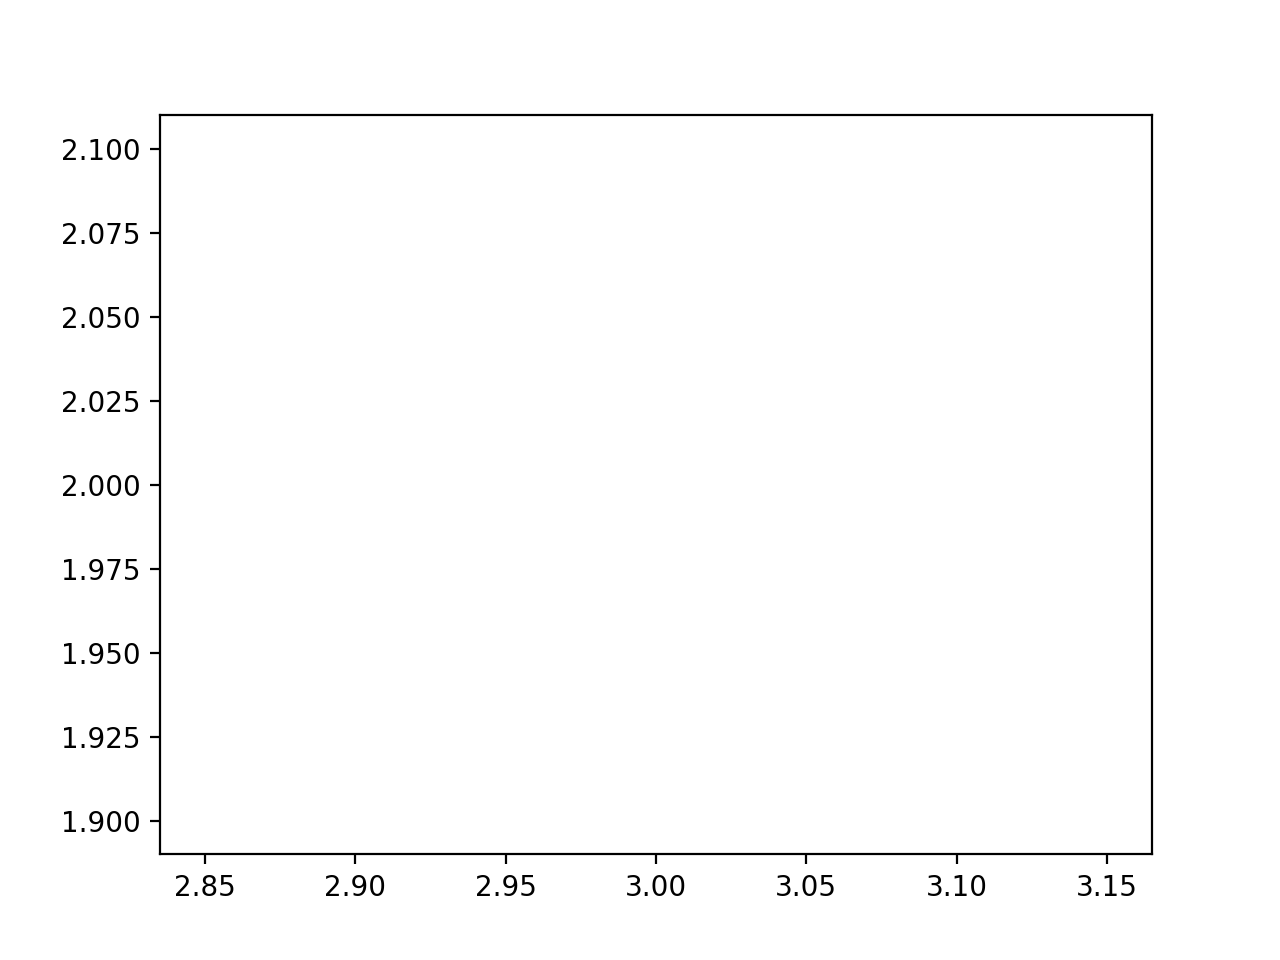

In [13]:
plt.plot(3,2)

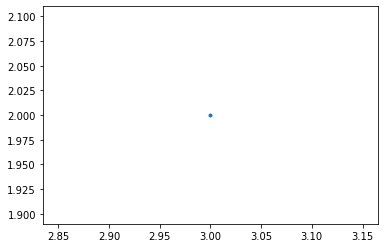

In [4]:
plt.plot(3,2, ".")

In [14]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvasAgg(fig)
ax = fig.add_subplot(111)
ax.plot(3,2,".")
canvas.print_png("test.png")

<IPython.core.display.Javascript object>


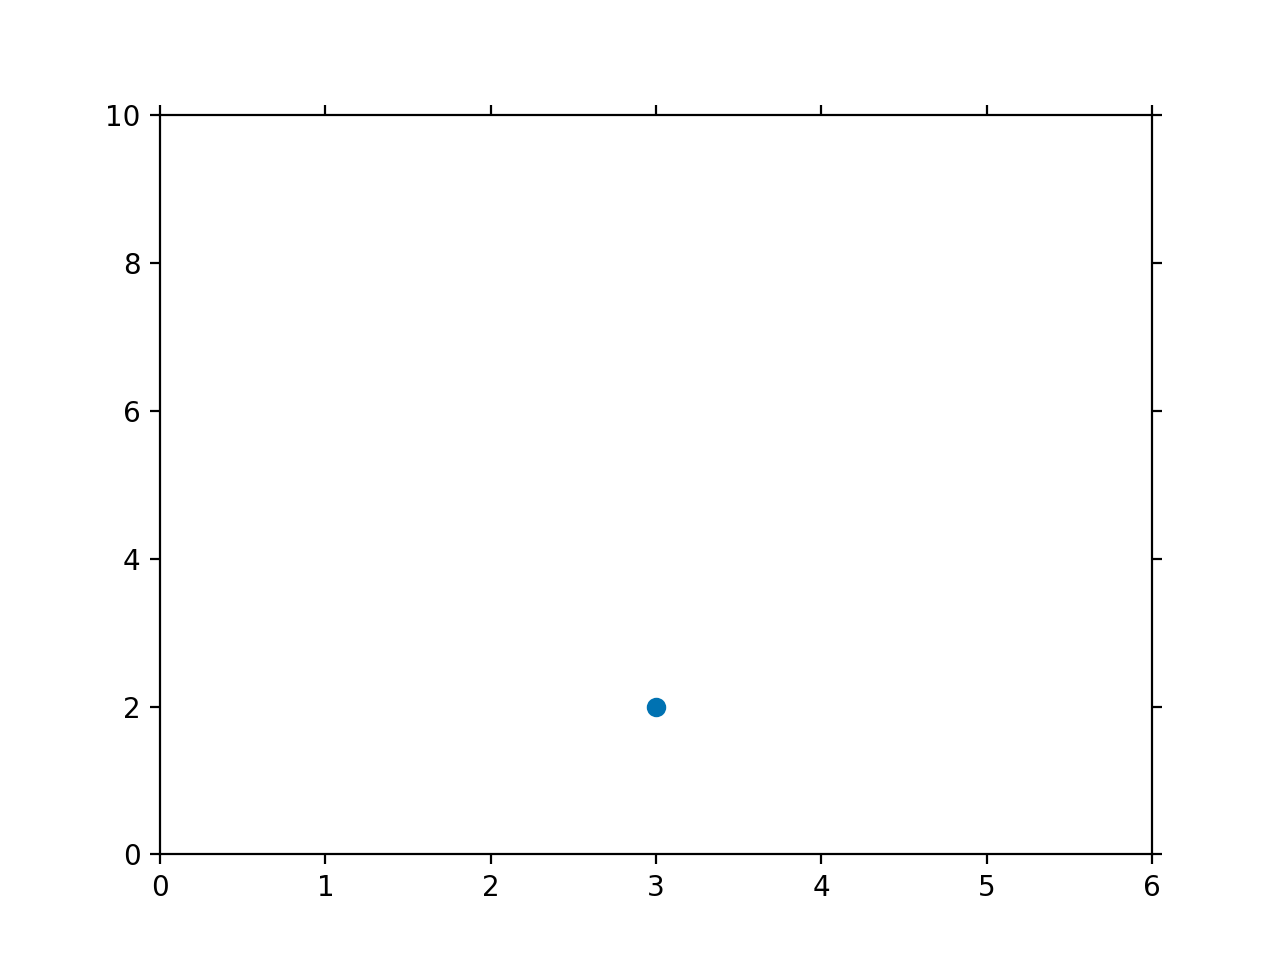

[0, 6, 0, 10]

In [15]:
plt.figure()
plt.plot(3,2,'o')
ax = plt.gca()
ax.axis([0,6,0,10])

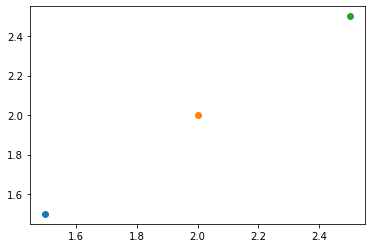

In [7]:
plt.figure()
plt.plot(1.5, 1.5, 'o')
plt.plot(2,2, 'o')
plt.plot(2.5, 2.5, 'o')


In [16]:
ax = plt.gca()
ax.get_children()

 Text(0.5, 1, ''),
 Text(0.0, 1, ''),
 Text(1.0, 1, ''),

`pyplot` can retrieve the current figure using `.gcf()` and the current axes using `.gca()`

### Line Plots with Shading

<IPython.core.display.Javascript object>


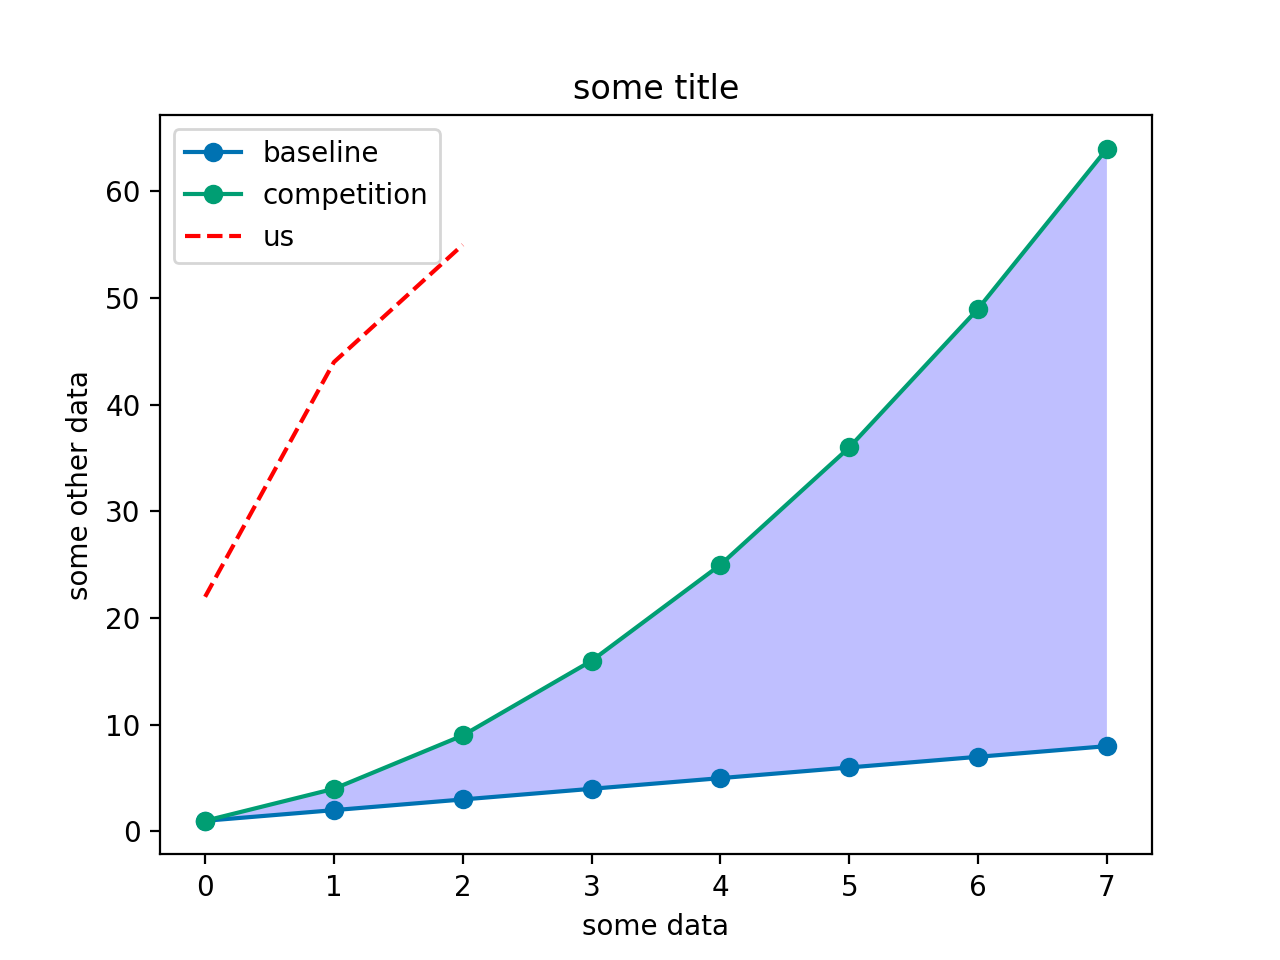

In [17]:
linear_data = np.array([1,2,3,4,5,6,7,8])
quadratic_data = linear_data**2

#knows to use index of series as x values

plt.figure()
plt.plot(linear_data, '-o', quadratic_data, '-o')


plt.plot([22, 44, 55], '--r')
plt.xlabel('some data')
plt.ylabel('some other data')
plt.title('some title')
plt.legend(['baseline', 'competition', 'us'])

# fill between
plt.gca().fill_between(range(len(linear_data)), linear_data, quadratic_data, facecolor = 'blue', alpha = 0.25)

### Subplots

In [62]:
plt.subplot?

<IPython.core.display.Javascript object>


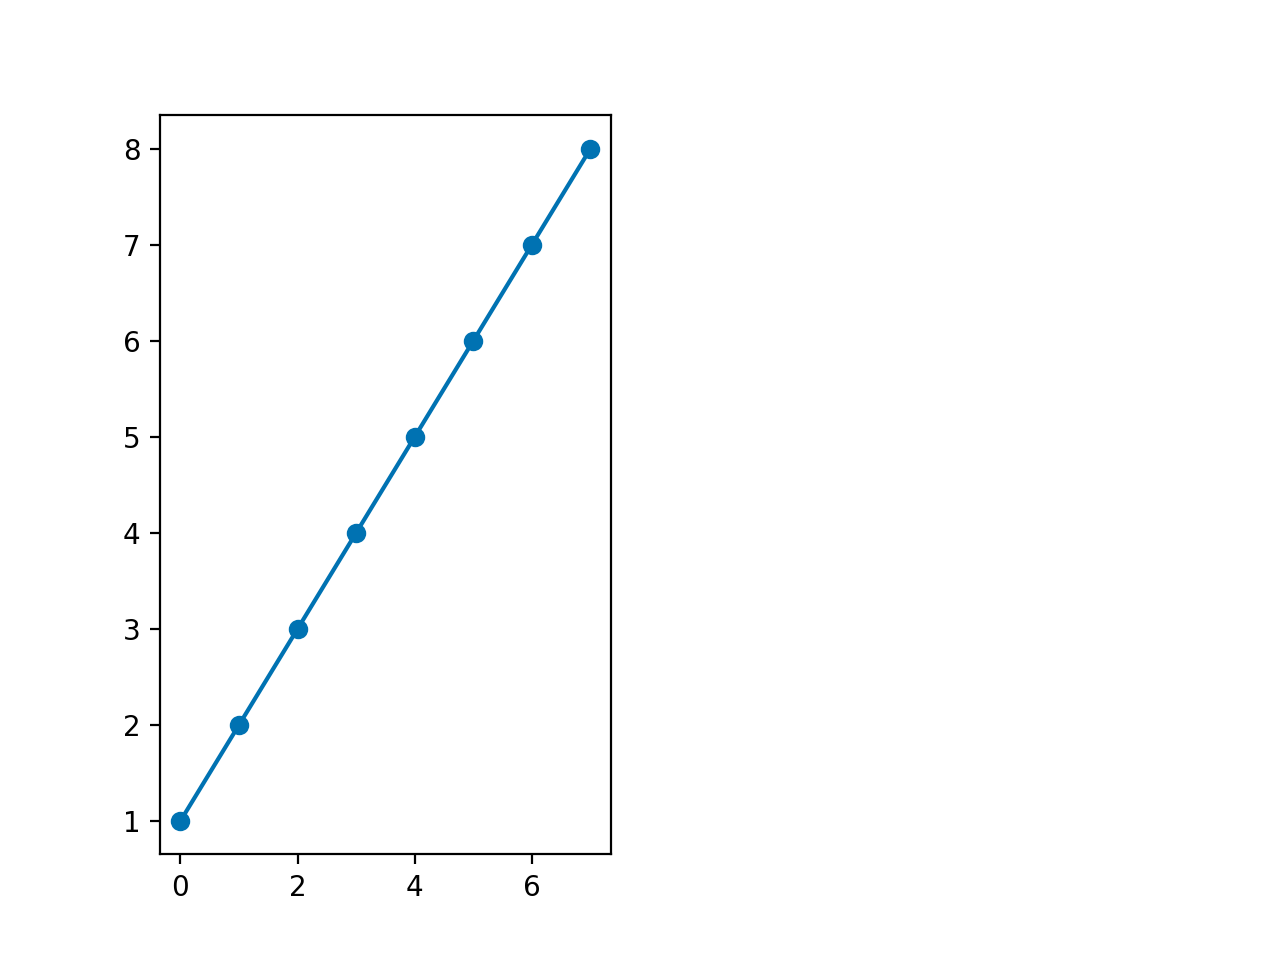

In [18]:
plt.figure()
plt.subplot(1,2,1)
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

In [66]:
exponential_data = linear_data**2
plt.subplot(1,2,2)
plt.plot(exponential_data, '-o')

/Users/nicholebennett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


In [19]:
# notice this changes the axes--we can deal with this with shareaxes
plt.subplot(1,2,1)
plt.plot(exponential_data, '-x')

/Users/nicholebennett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


NameError: name 'exponential_data' is not defined

<IPython.core.display.Javascript object>


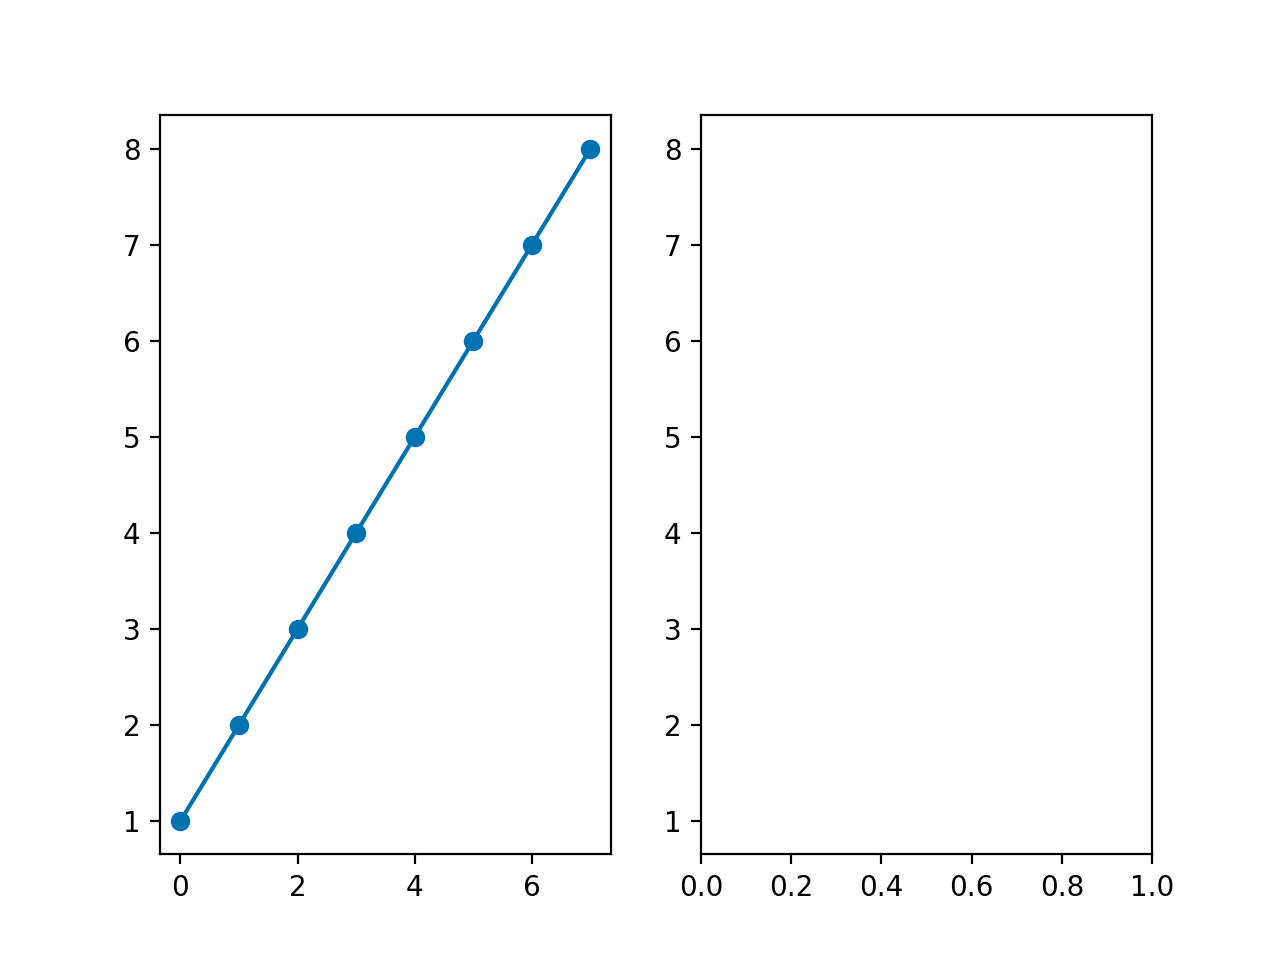

NameError: name 'exponential_data' is not defined

In [20]:
plt.figure()
ax1 = plt.subplot(121)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(122, sharey = ax1)
plt.plot(exponential_data, '-x', )

<IPython.core.display.Javascript object>


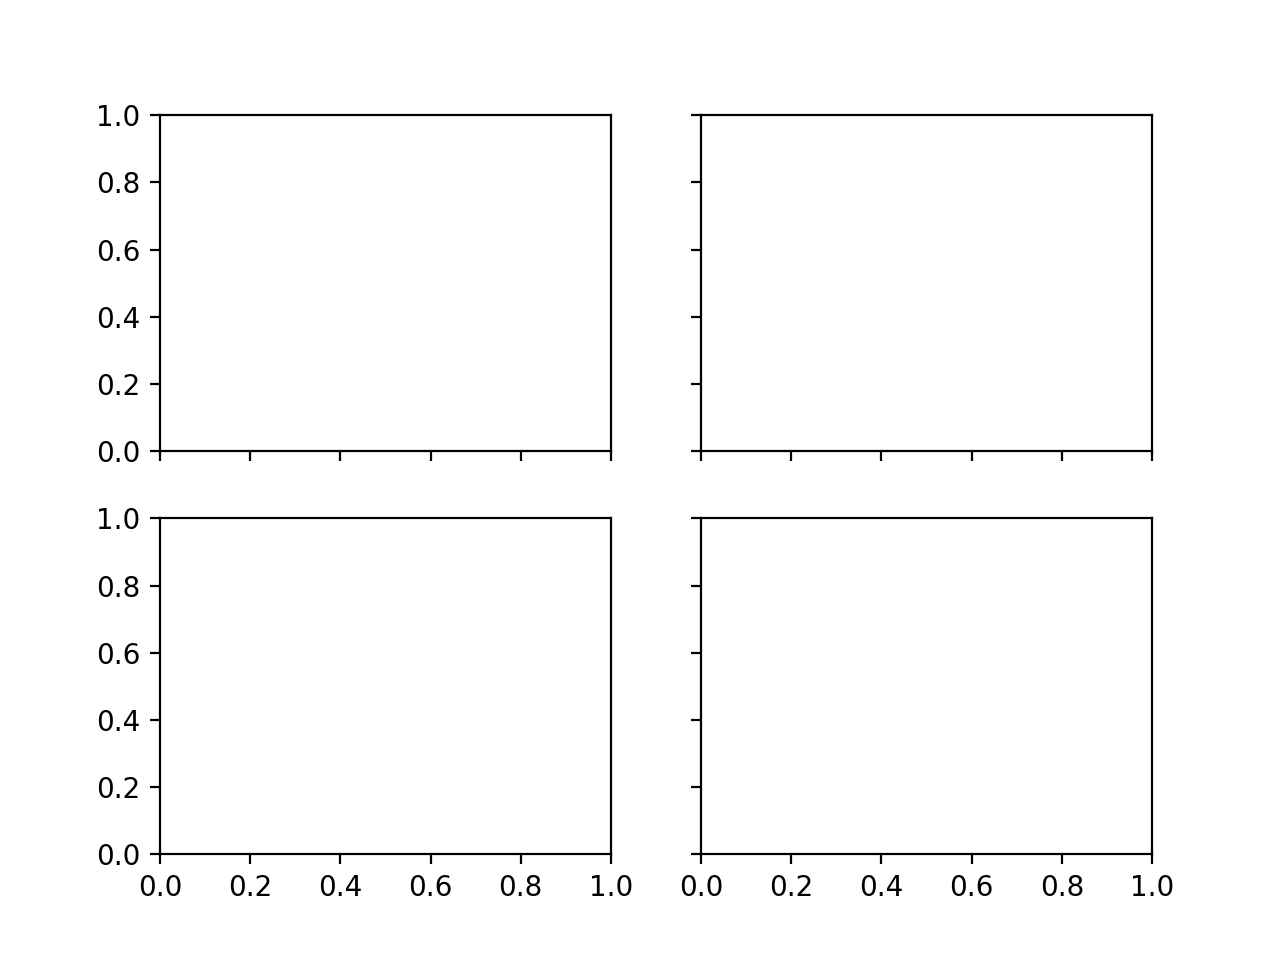

In [71]:
fig, ((ax1, ax2), (ax3, ax4) ) = plt.subplots(2, 2, sharey=True, sharex = True)

<IPython.core.display.Javascript object>


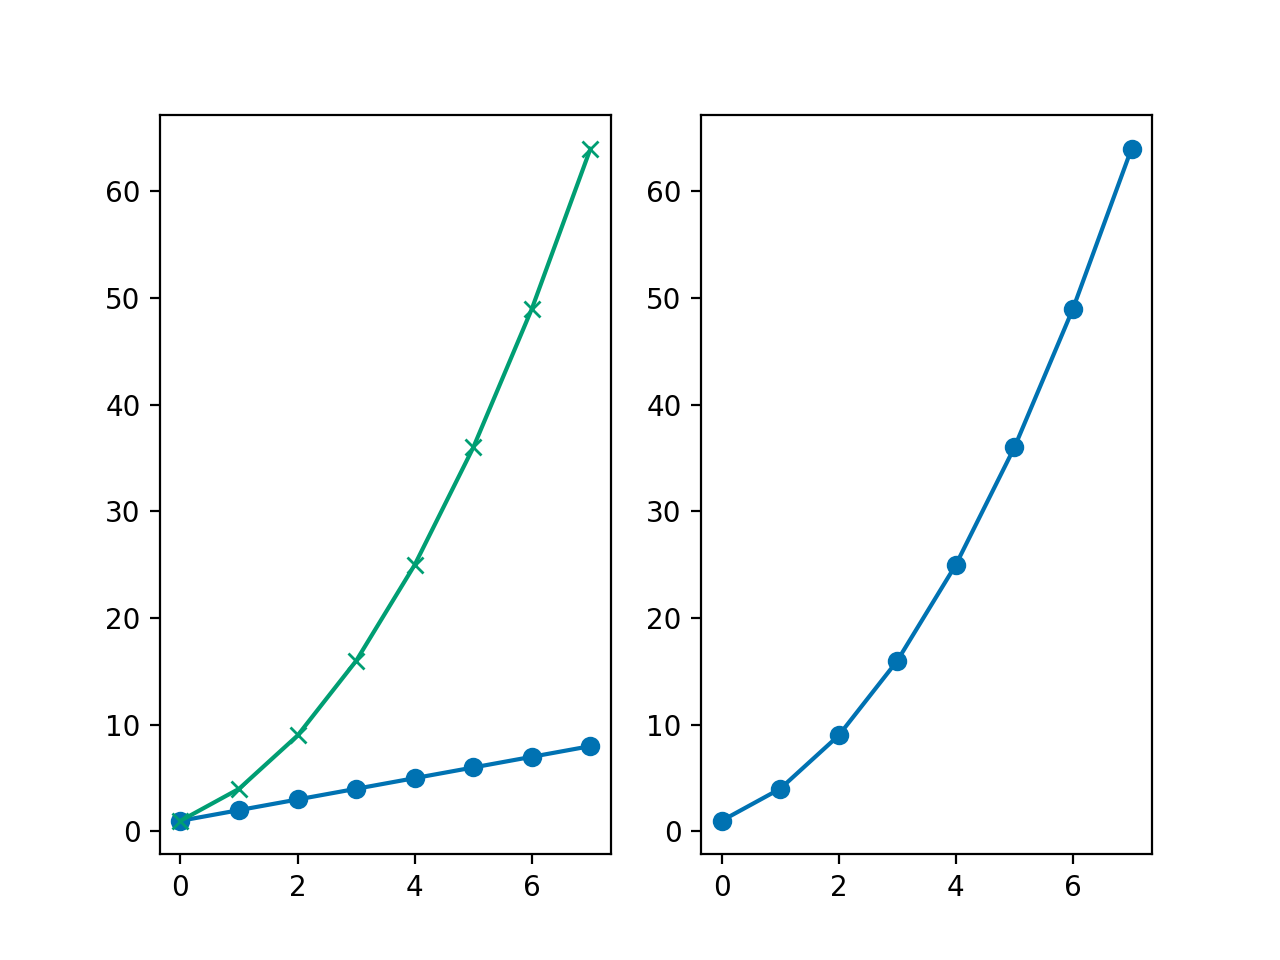

/Users/nicholebennett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


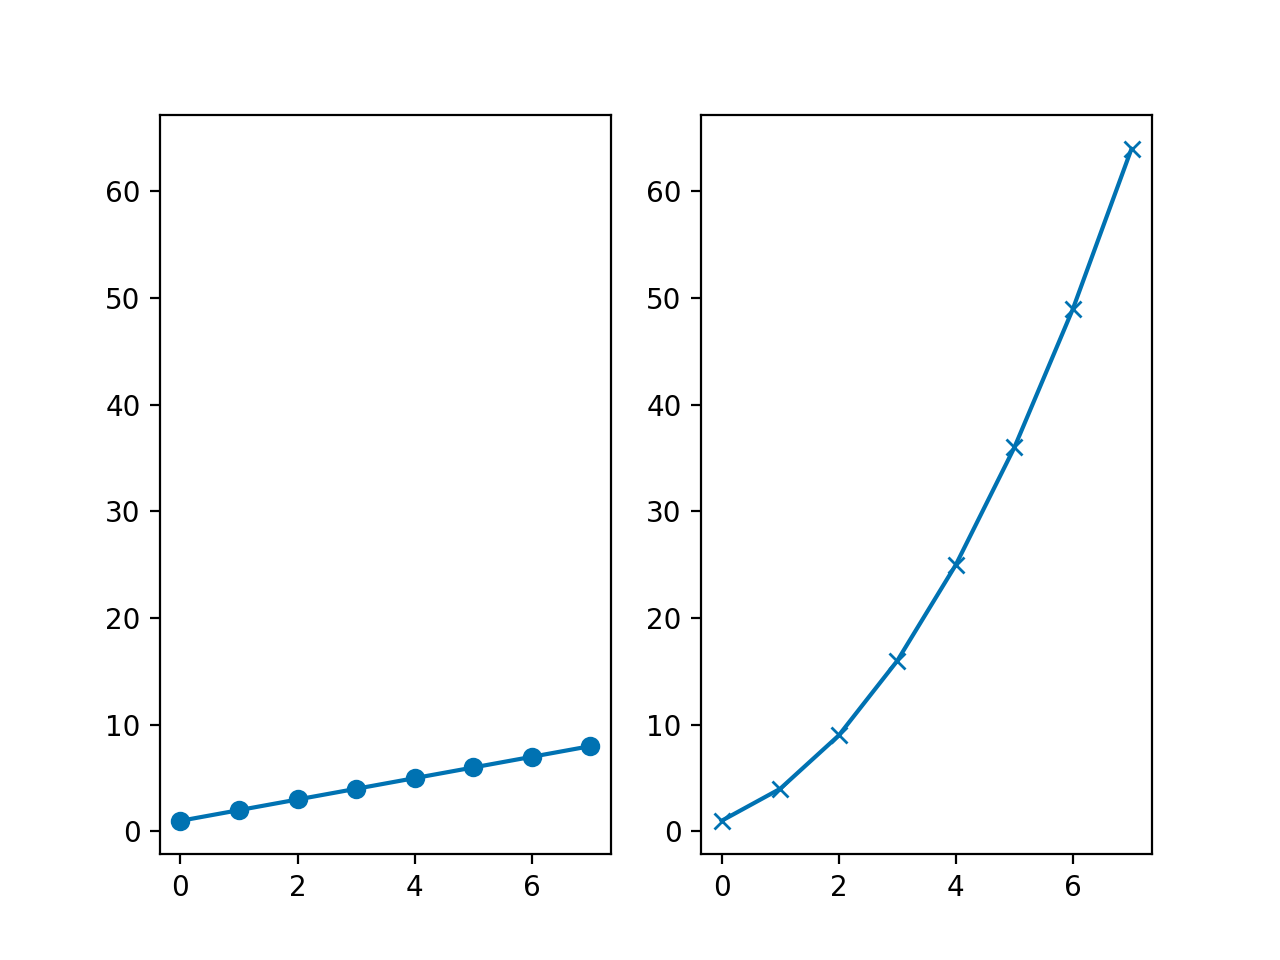

<IPython.core.display.Javascript object>


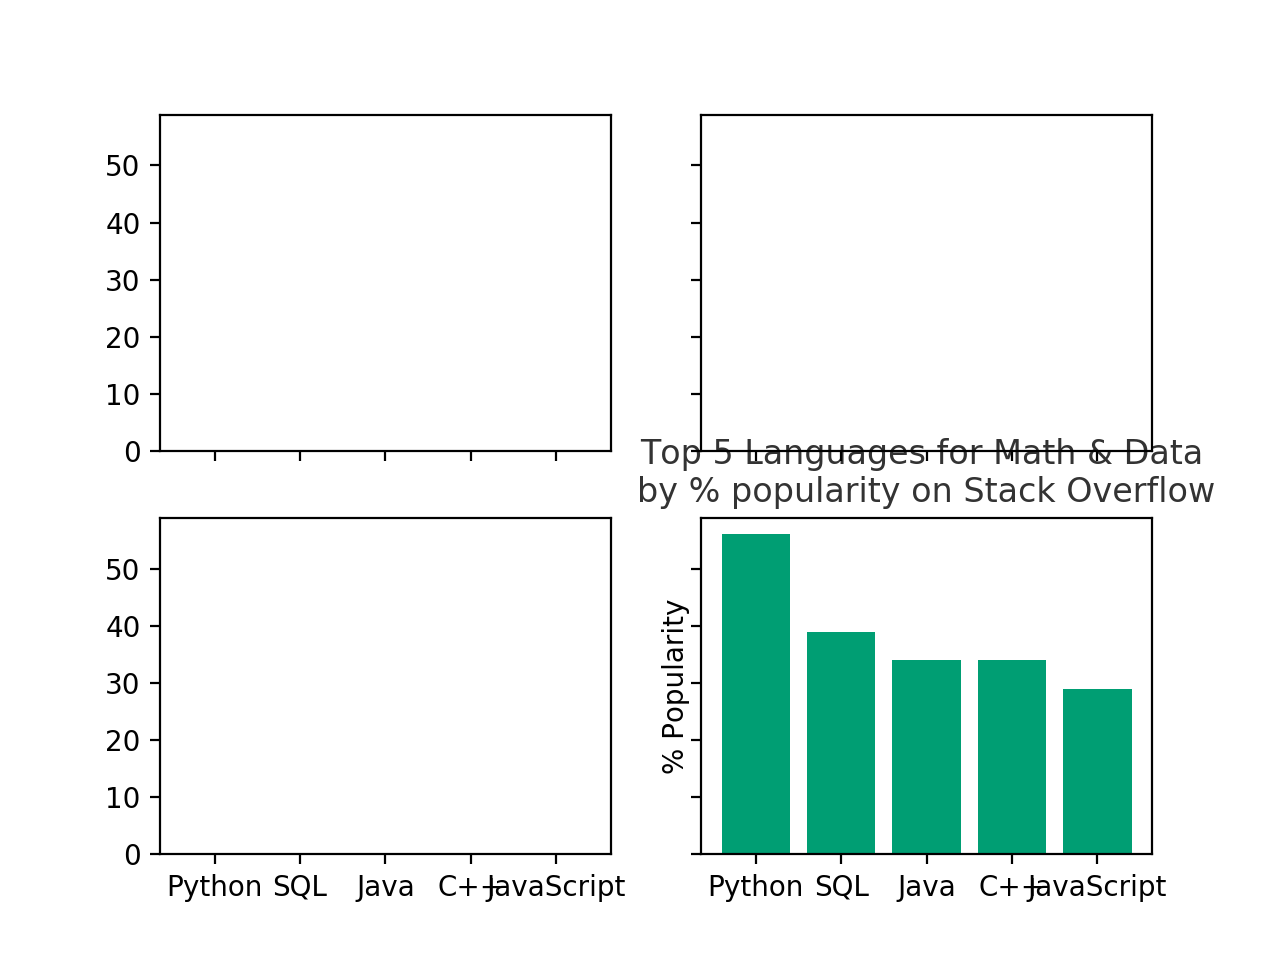

In [21]:
### Subplots

plt.subplot?

plt.figure()
plt.subplot(1,2,1)
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')

exponential_data = linear_data**2
plt.subplot(1,2,2)
plt.plot(exponential_data, '-o')

# notice this changes the axes--we can deal with this with shareaxes
plt.subplot(1,2,1)
plt.plot(exponential_data, '-x')

plt.figure()
ax1 = plt.subplot(121)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(122, sharey = ax1)
plt.plot(exponential_data, '-x', )

fig, ((ax1, ax2), (ax3, ax4) ) = plt.subplots(2, 2, sharey=True, sharex = True)

## Scatterplots

<IPython.core.display.Javascript object>


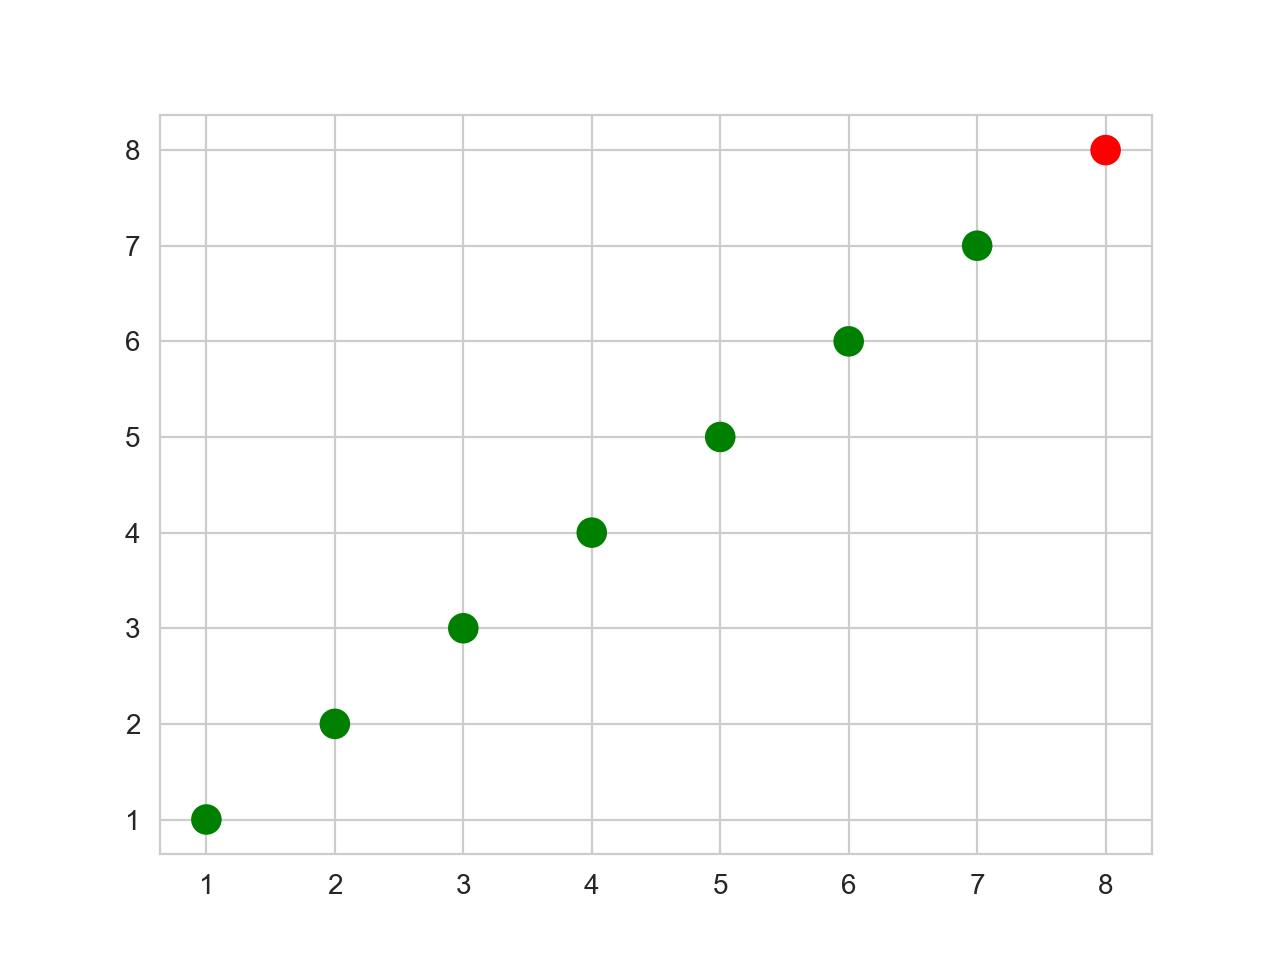

In [212]:
import numpy as np
x = np.array([1,2,3,4,5,6,7, 8])
y = x
colors = ['green']*(len(x)-1)
colors.append('red')
plt.figure()
plt.scatter(x,y, s=100, c=colors)

I recommend getting into lambda functions and list comprehensions if you want to get really savvy with plotting.

The `zip()` function will also be of use, so let's take an aside to learn it here:

`zip()` takes a number of iterables and makes tuples out of them, matching their elements based on index.

It is a "lazy" function and will just create a generator if we don't use the `list()` function on it.

In [213]:
zip_generator = zip([1,2,3,4,5],[6,7,8,9,10])
list(zip_generator)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

In [214]:
zip_generator = zip([1,2,3,4,5],[6,7,8,9,10])
x, y = zip(*zip_generator)
print(x)
print(y)

(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


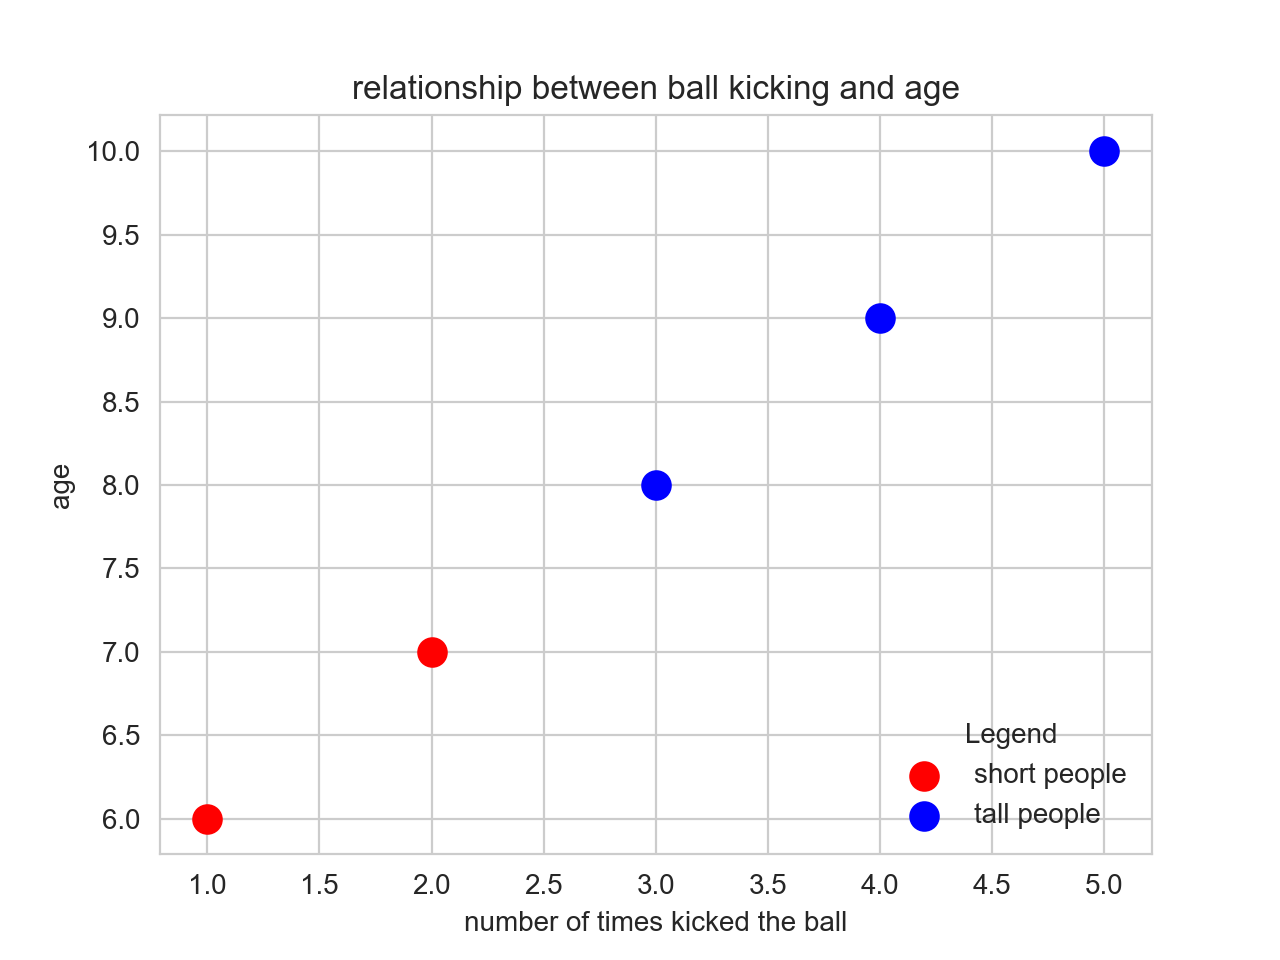

In [215]:
plt.figure()
plt.scatter(x[:2], y[:2], s=100, c = 'red', label='short people')
plt.scatter(x[2:], y[2:], s=100, c = 'blue', label='tall people')
plt.xlabel("number of times kicked the ball")
plt.ylabel("age")
plt.title("relationship between ball kicking and age")
plt.legend(loc = 4, frameon=False, title="Legend")

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

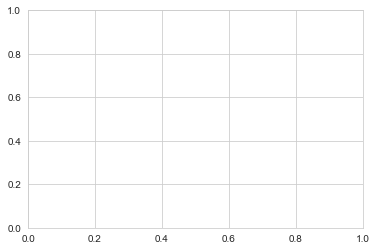

In [196]:
plt.gca().get_children()

Handling dates is a pain in Python. The pandas `datetime()` function can be helpful, but handling dates is another journey.

<IPython.core.display.Javascript object>


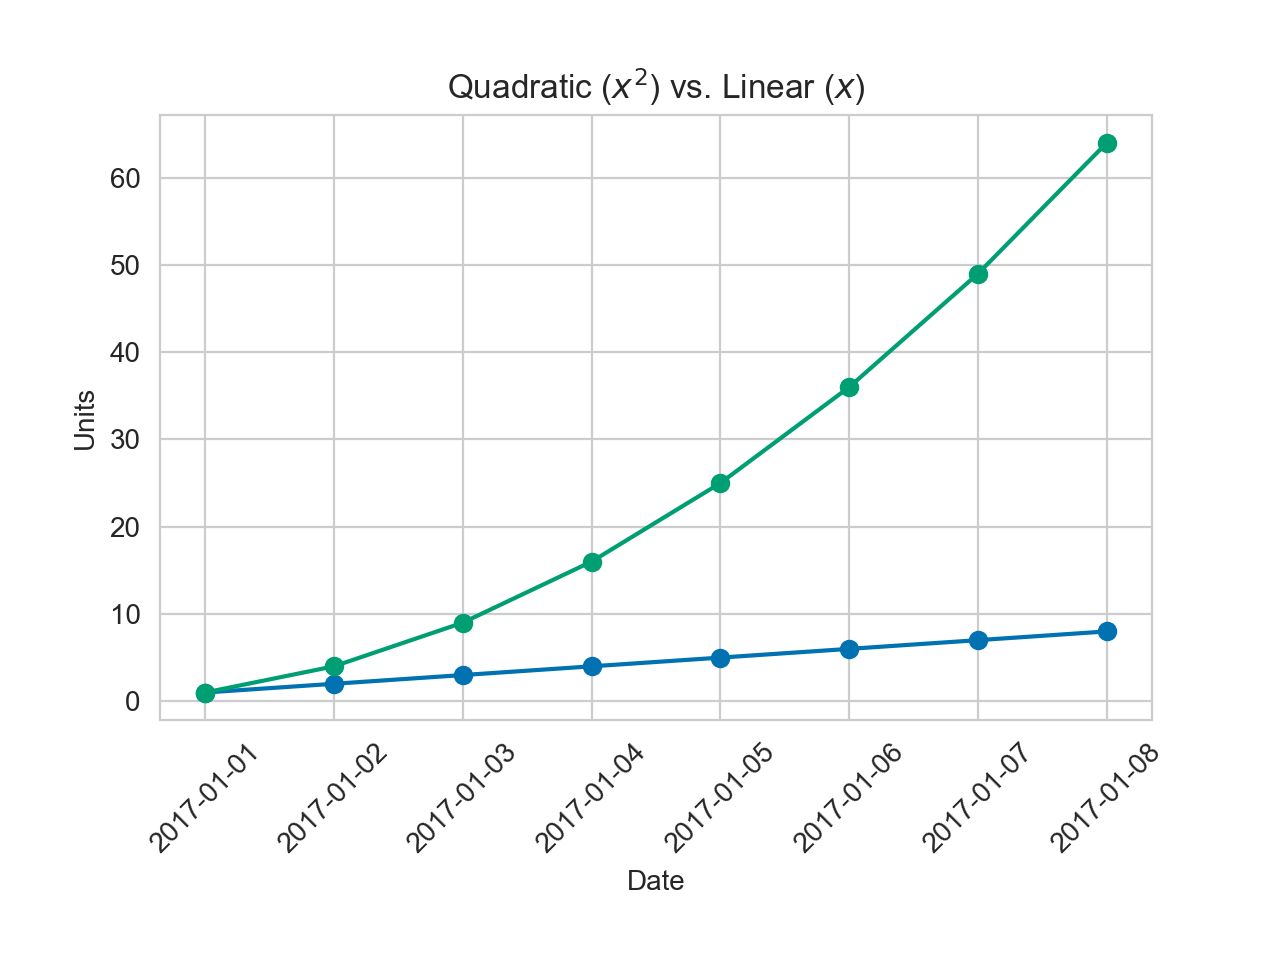

In [218]:
import pandas as pd
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype = 'datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates))
plt.plot(observation_dates, linear_data, '-o', observation_dates, quadratic_data, '-o')                          

In [219]:
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)

In [220]:
plt.subplots_adjust(bottom=0.25)

You can also use Latex in your text for your figures.

In [221]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Quadratic vs. Linear')

Text(0.5, 1, 'Quadratic vs. Linear')

In [222]:
ax.set_title('Quadratic ($x^2$) vs. Linear ($x$)')

Text(0.5, 1, 'Quadratic ($x^2$) vs. Linear ($x$)')

## Histograms

<IPython.core.display.Javascript object>


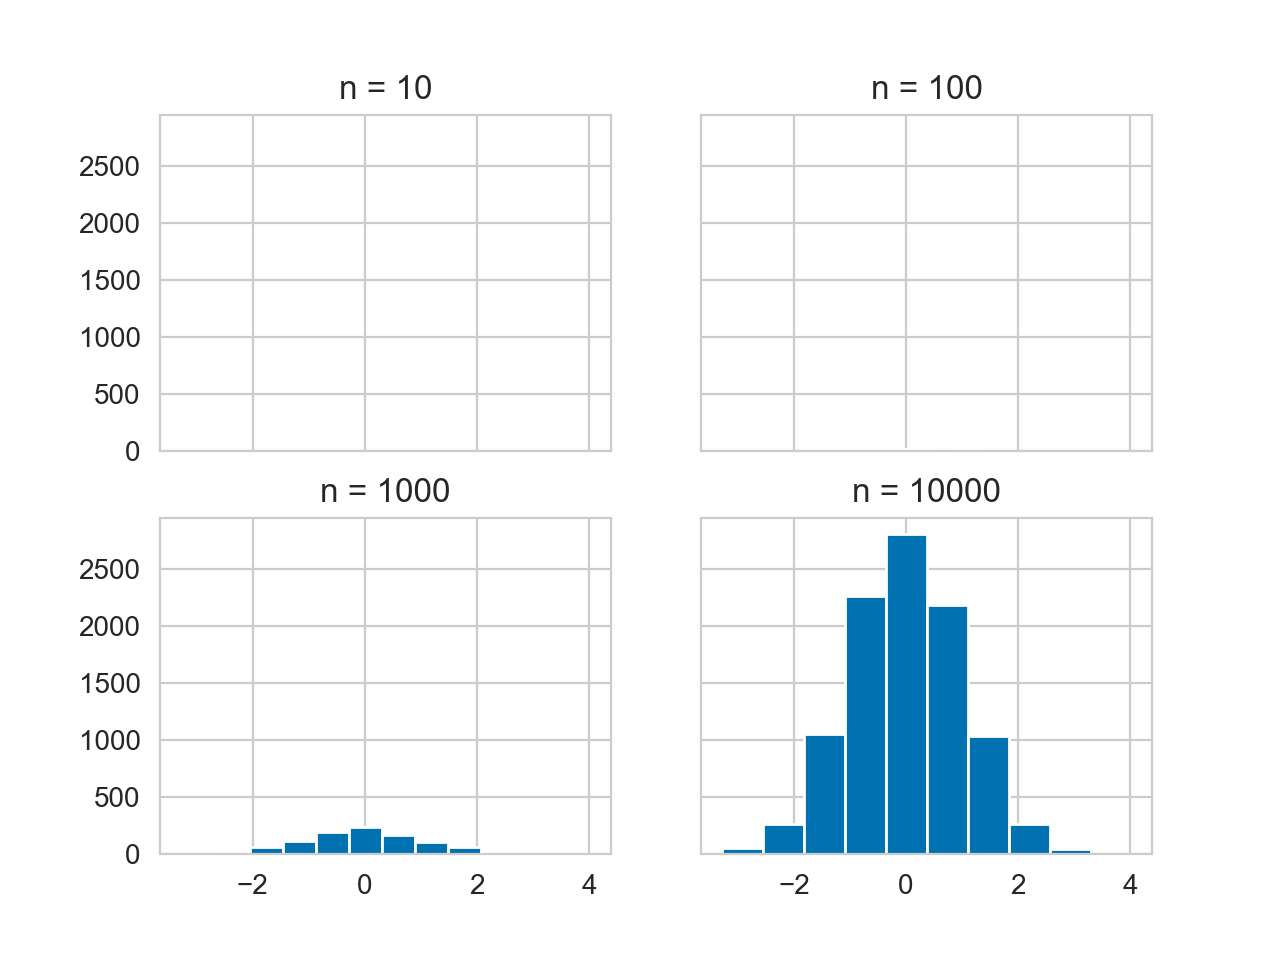

In [227]:
# notice these get wider because the bins adjust
fig, ((ax1, ax2), (ax3, ax4) ) = plt.subplots(2, 2, sharey=True, sharex = True)
axs = [ax1, ax2, ax3, ax4]
for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size = sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n = {}'.format(sample_size))

<IPython.core.display.Javascript object>


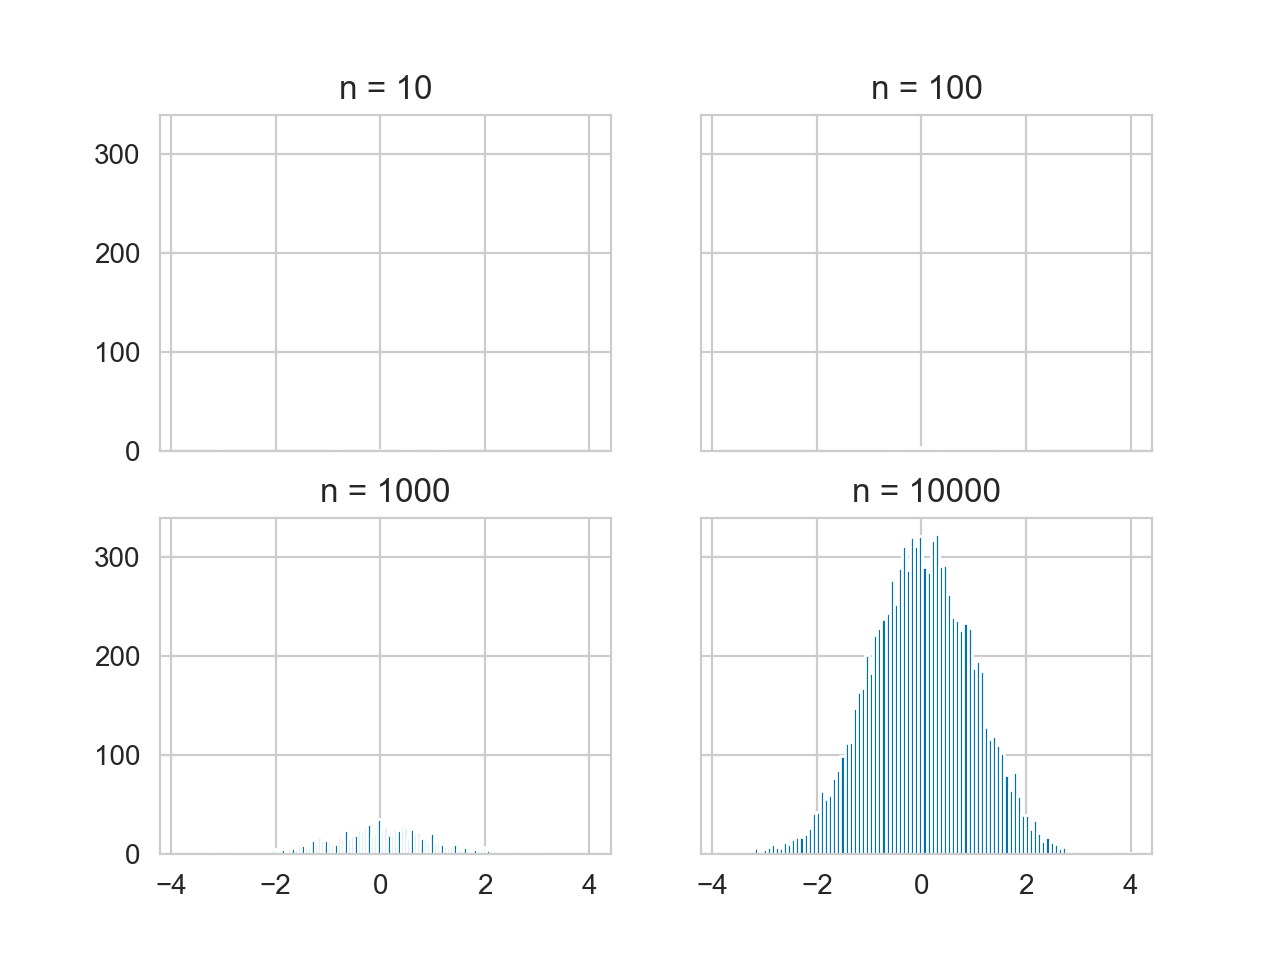

In [228]:
fig, ((ax1, ax2), (ax3, ax4) ) = plt.subplots(2, 2, sharey=True, sharex = True)
axs = [ax1, ax2, ax3, ax4]
for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size = sample_size)
    axs[n].hist(sample, bins = 100)
    axs[n].set_title('n = {}'.format(sample_size))

How many bins should you plot when using a histogram? There's not a clear answer, and it depends. (some reading: http://users.stat.umn.edu/~gmeeden/papers/hist.pdf)

<IPython.core.display.Javascript object>


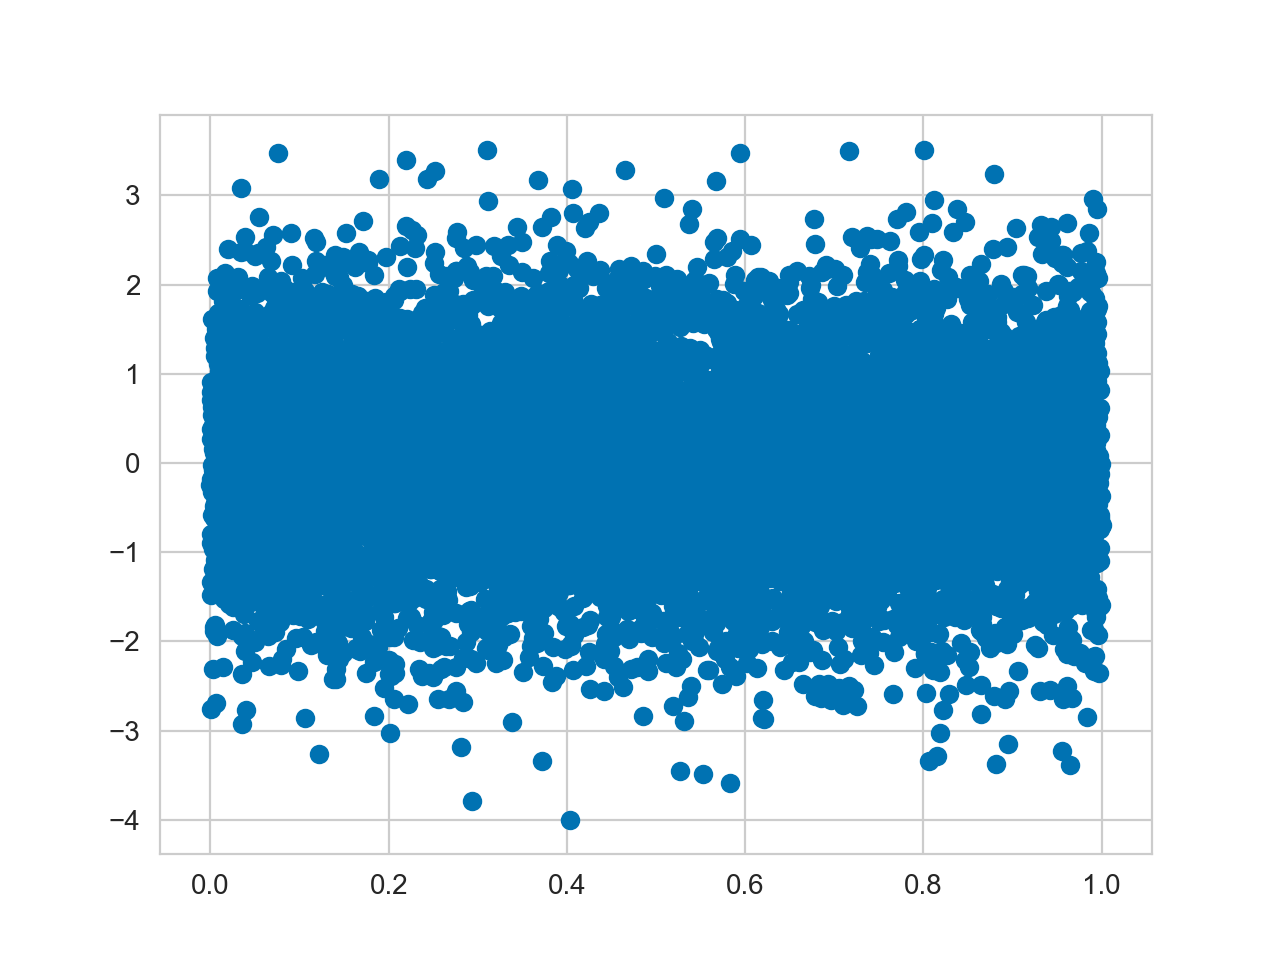

In [229]:
plt.figure()
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
plt.scatter(X, Y)

<IPython.core.display.Javascript object>


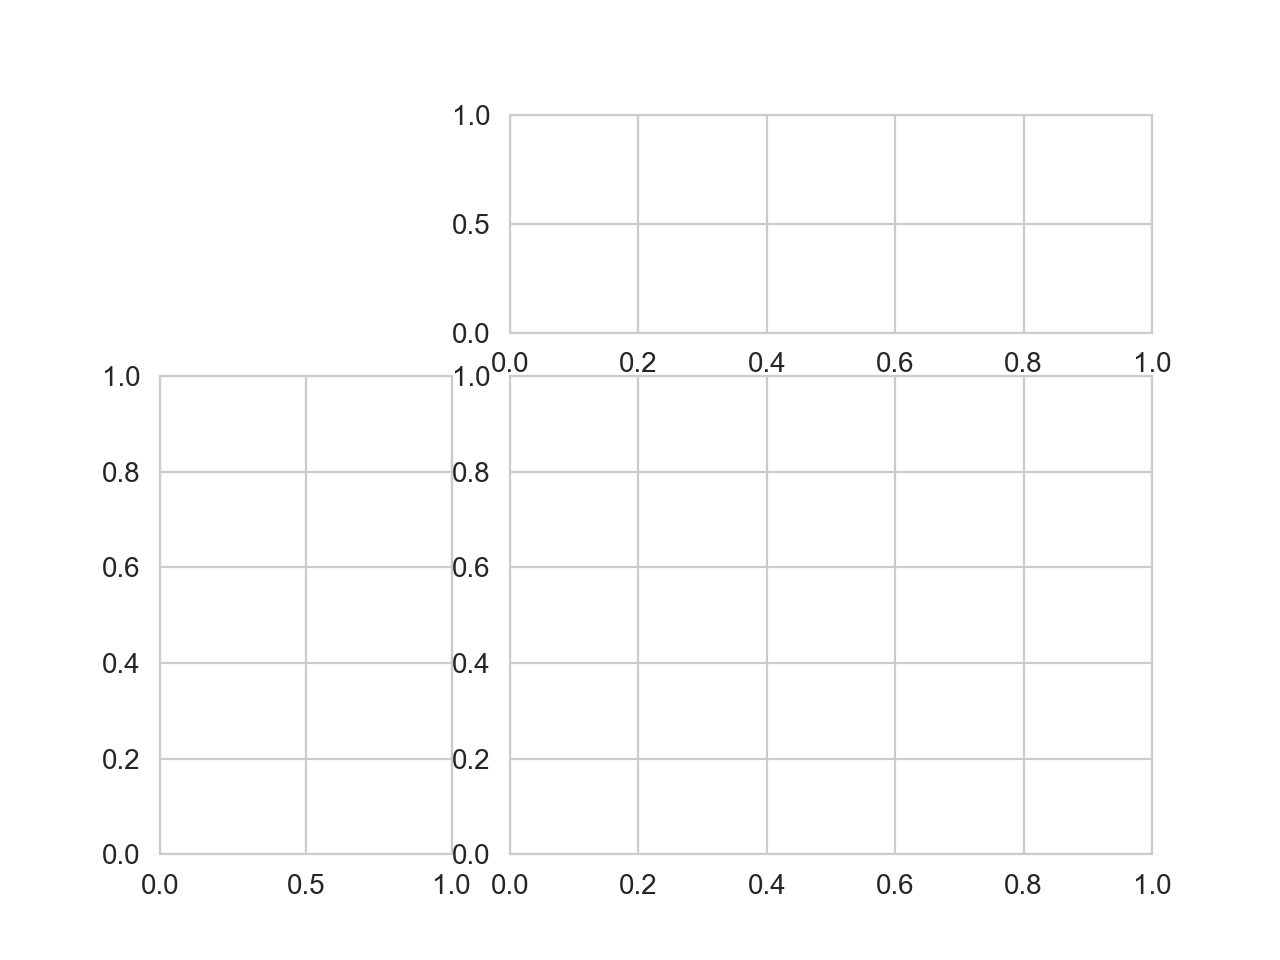

In [230]:
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3,3)
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [82]:
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins = 100, normed = True)
s = side_histogram.hist(Y, bins = 100, orientation = 'horizontal', normed = True)
side_histogram.invert_xaxis()

/Users/nicholebennett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/nicholebennett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


In [7]:
normal_sample = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
random_sample = np.random.random(size = 10000)
gamma_sample = np.random.gamma(2, size = 10000)

df = pd.DataFrame({'normal': normal_sample, 'random': random_sample, 'gamma': gamma_sample})

In [8]:
df.describe()

normal        random         gamma
count  10000.000000  10000.000000  10000.000000
mean       0.009311      0.499867      1.990510
std        1.004399      0.289923      1.397221
min       -3.816345      0.000067      0.016419
25%       -0.661123      0.246811      0.958021
50%        0.011560      0.501193      1.688006
75%        0.678549      0.748500      2.668018
max        3.750647      0.999931     12.619049

<IPython.core.display.Javascript object>


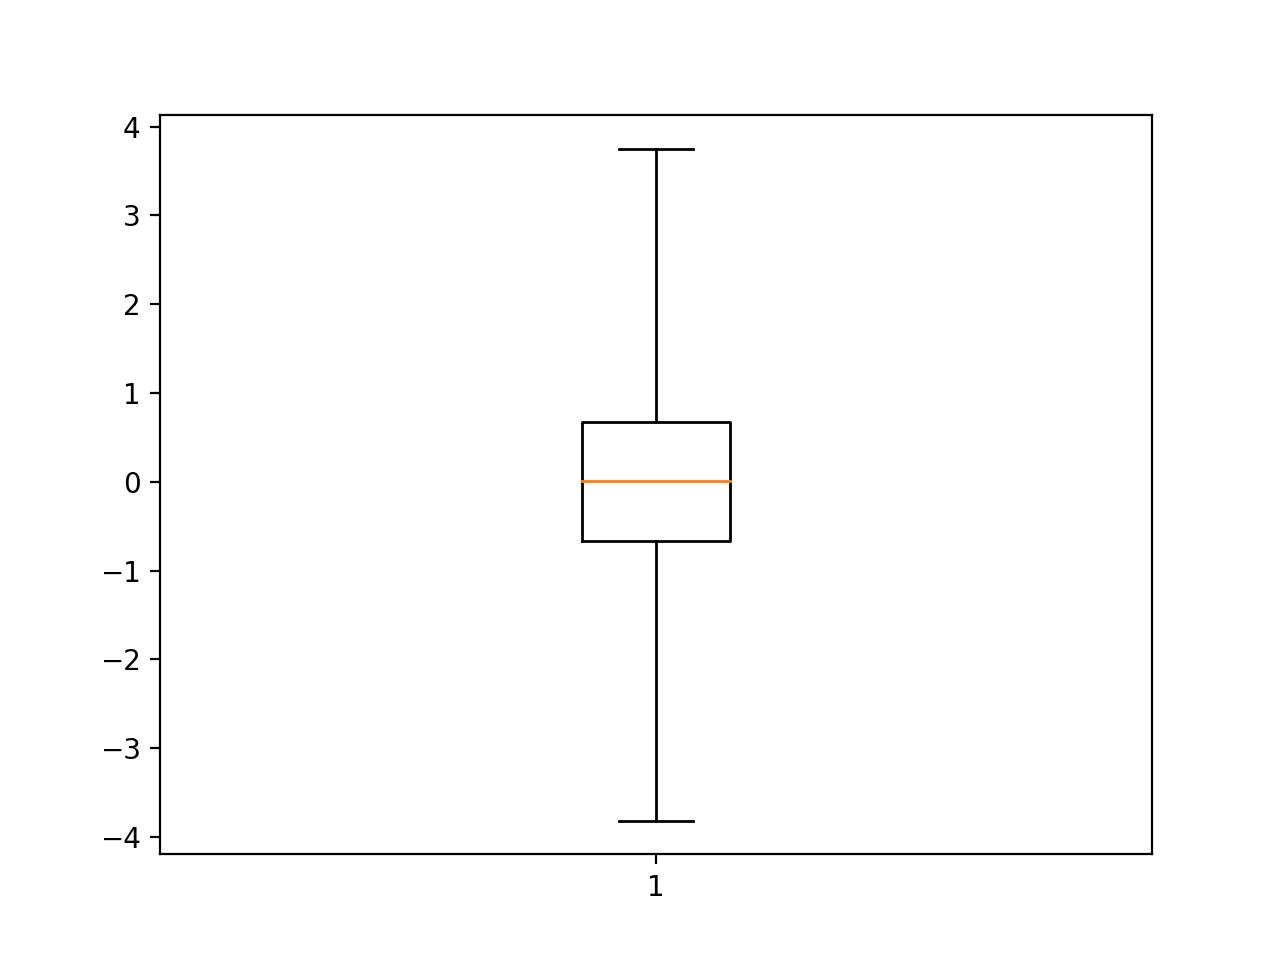

In [9]:
plt.figure()
_ = plt.boxplot(df['normal'], whis = 'range')

In [2]:
plt.clf()
_= plt.boxplot([df['normal'], df['random'], df['gamma']], whis = 'range')

NameError: name 'plt' is not defined

<IPython.core.display.Javascript object>


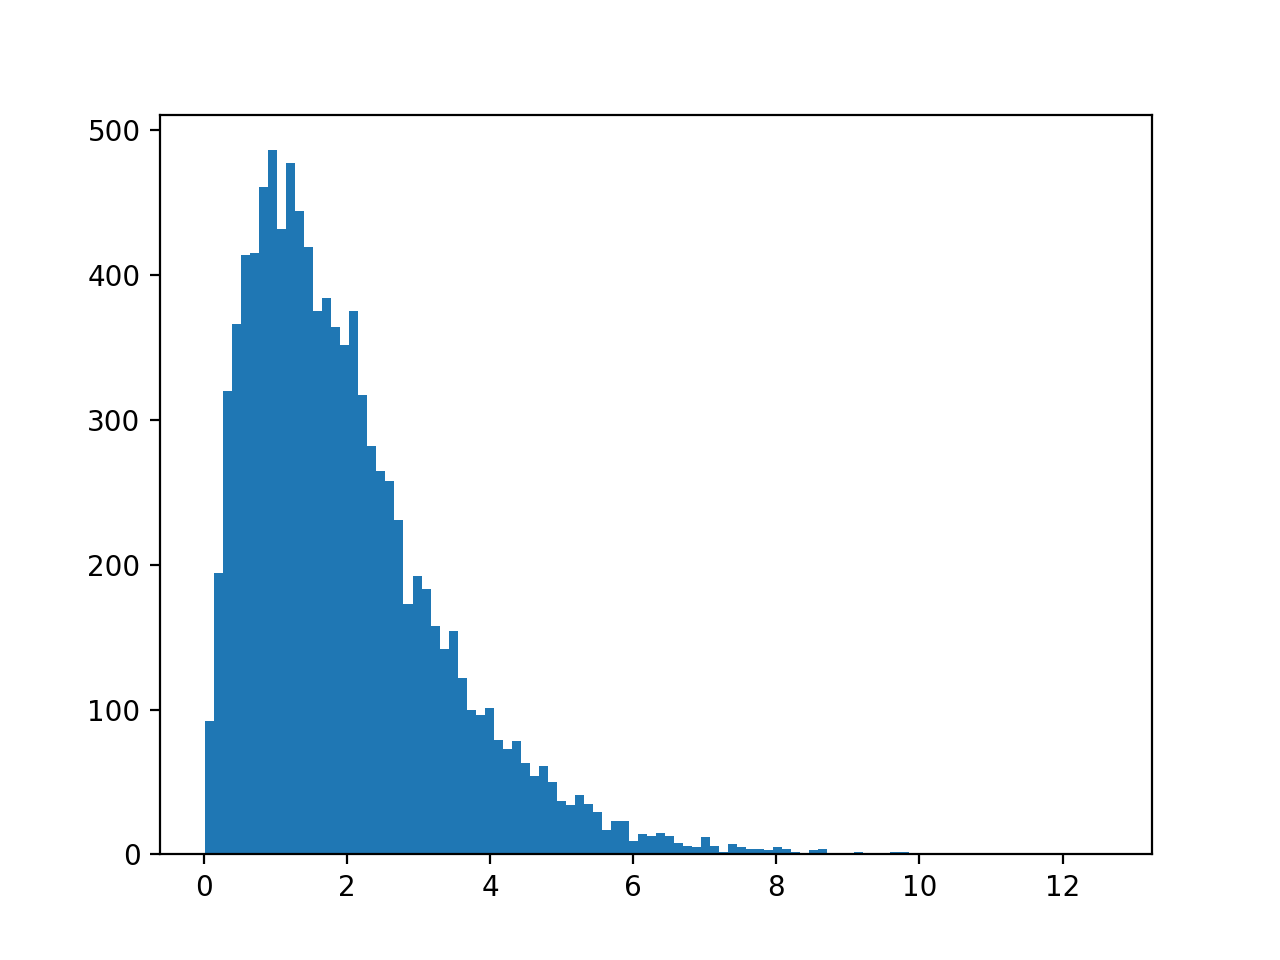

(array([ 92., 194., 320., 366., 414., 415., 461., 486., 432., 477., 444.,
        419., 375., 384., 364., 352., 375., 317., 282., 265., 258., 231.,
        173., 192., 183., 158., 142., 154., 122., 100.,  96., 101.,  79.,
         73.,  78.,  63.,  54.,  61.,  50.,  37.,  34.,  41.,  35.,  29.,
         17.,  23.,  23.,   9.,  14.,  13.,  15.,  13.,   8.,   6.,   5.,
         12.,   6.,   2.,   7.,   5.,   4.,   4.,   3.,   5.,   4.,   2.,
          1.,   3.,   4.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   2.,
          2.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 0.01641911,  0.14244542,  0.26847172,  0.39449802,  0.52052432,
         0.64655062,  0.77257692,  0.89860323,  1.02462953,  1.15065583,
         1.27668213,  1.40270843,  1.52873473,  1.65476103,  1.78078734,
         1.90681364,  2.03283994,  2.15886624,  2.28489254,  2.41091884,
         2.53694515,  2.66

In [10]:
plt.figure()
plt.hist(df['gamma'], bins = 100)

We can add insets to our plots.

<IPython.core.display.Javascript object>


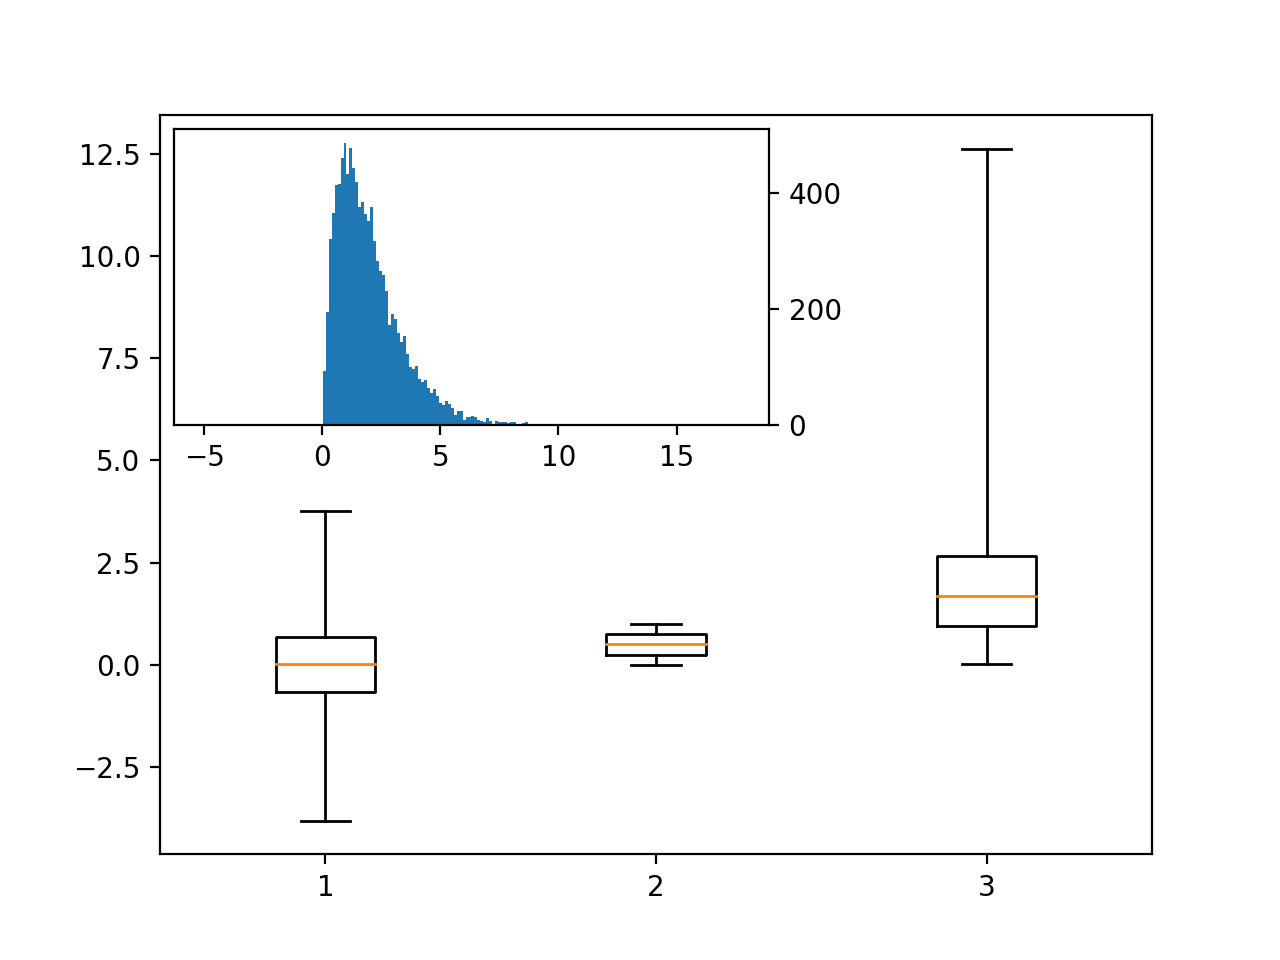

In [11]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis = 'range')
ax2 = mpl_il.inset_axes(plt.gca(), width = '60%', height = '40%', loc = 2)
ax2.hist(df['gamma'], bins = 100)
ax2.margins(x = 0.5)
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


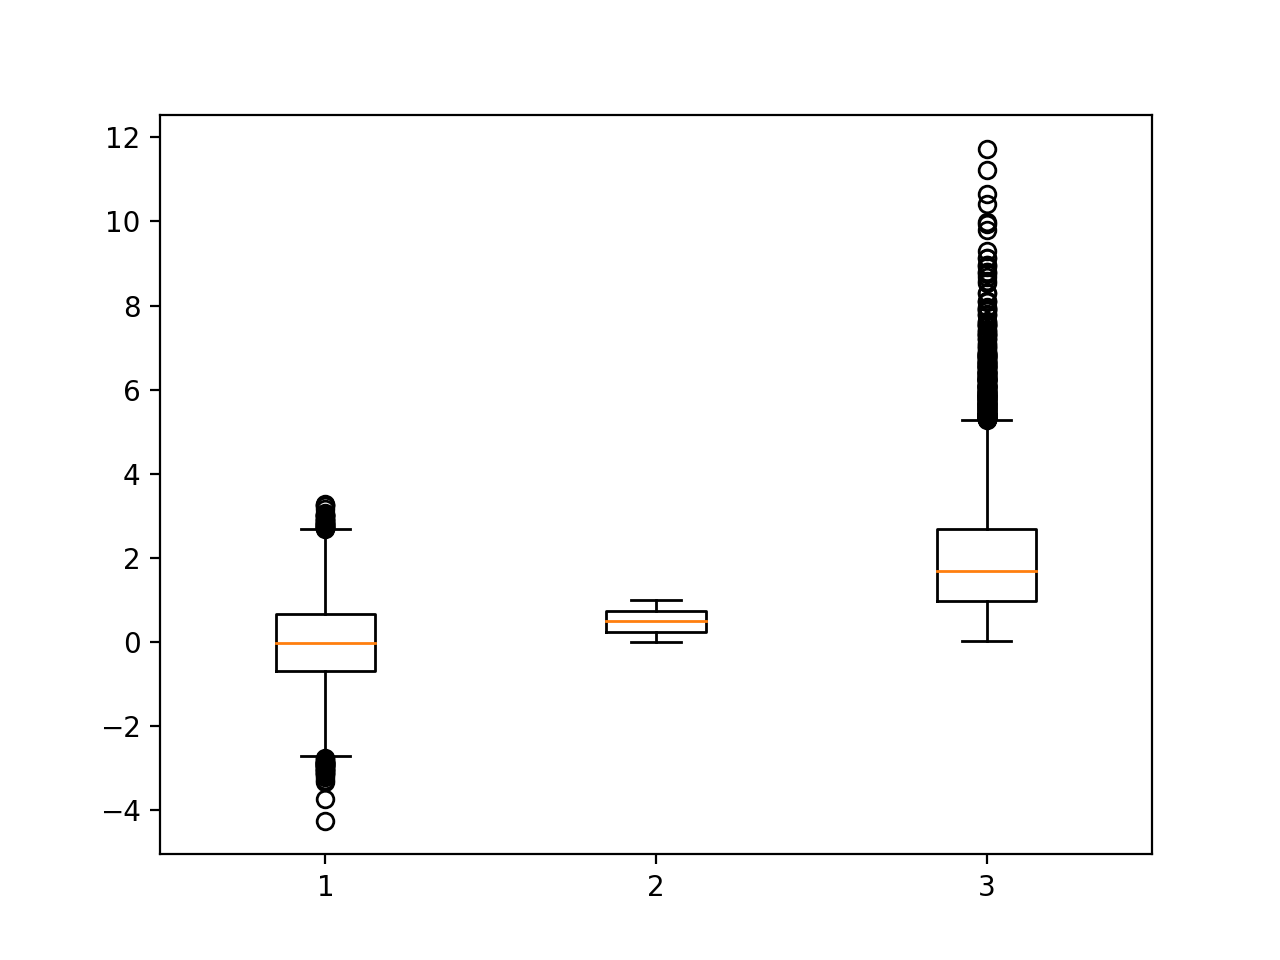

In [92]:
plt.figure()
_ = plt.boxplot([df['normal'], df['random'], df['gamma']])

## Bar Chart

<IPython.core.display.Javascript object>


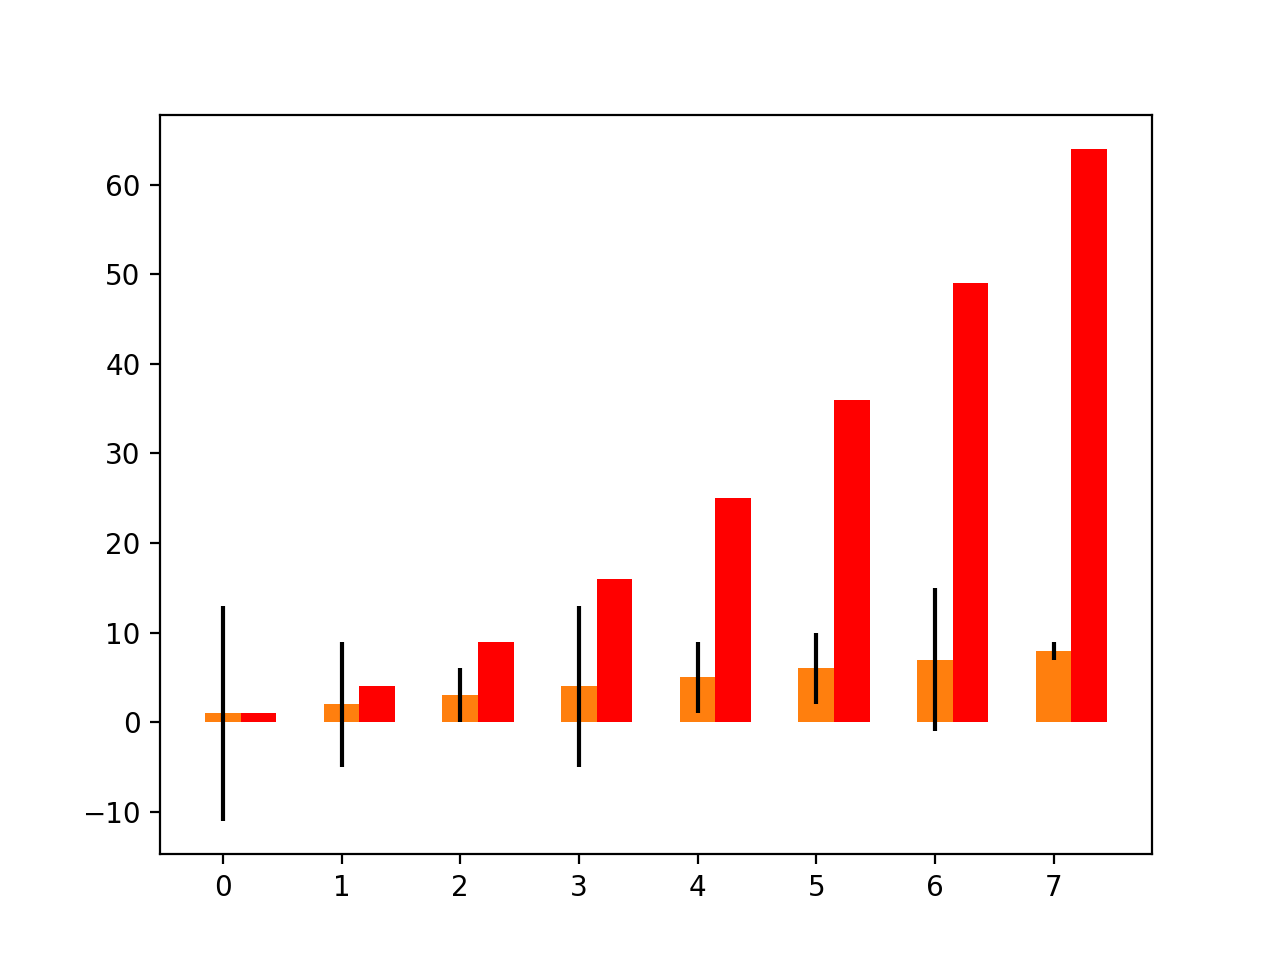

<BarContainer object of 8 artists>

In [49]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [50]:
# we do this by hand here, but it gets messy really fast
new_vals = []
for item in xvals:
    new_vals.append(item +0.3)

plt.bar(new_vals, quadratic_data, width = 0.3, color = 'red')

<BarContainer object of 8 artists>

Let's add some random error bars.

In [51]:
from random import randint
linear_err = [randint(1,15) for x in range(len(linear_data))]
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<BarContainer object of 8 artists>

We can alter the bar chart to be stacked.

<IPython.core.display.Javascript object>


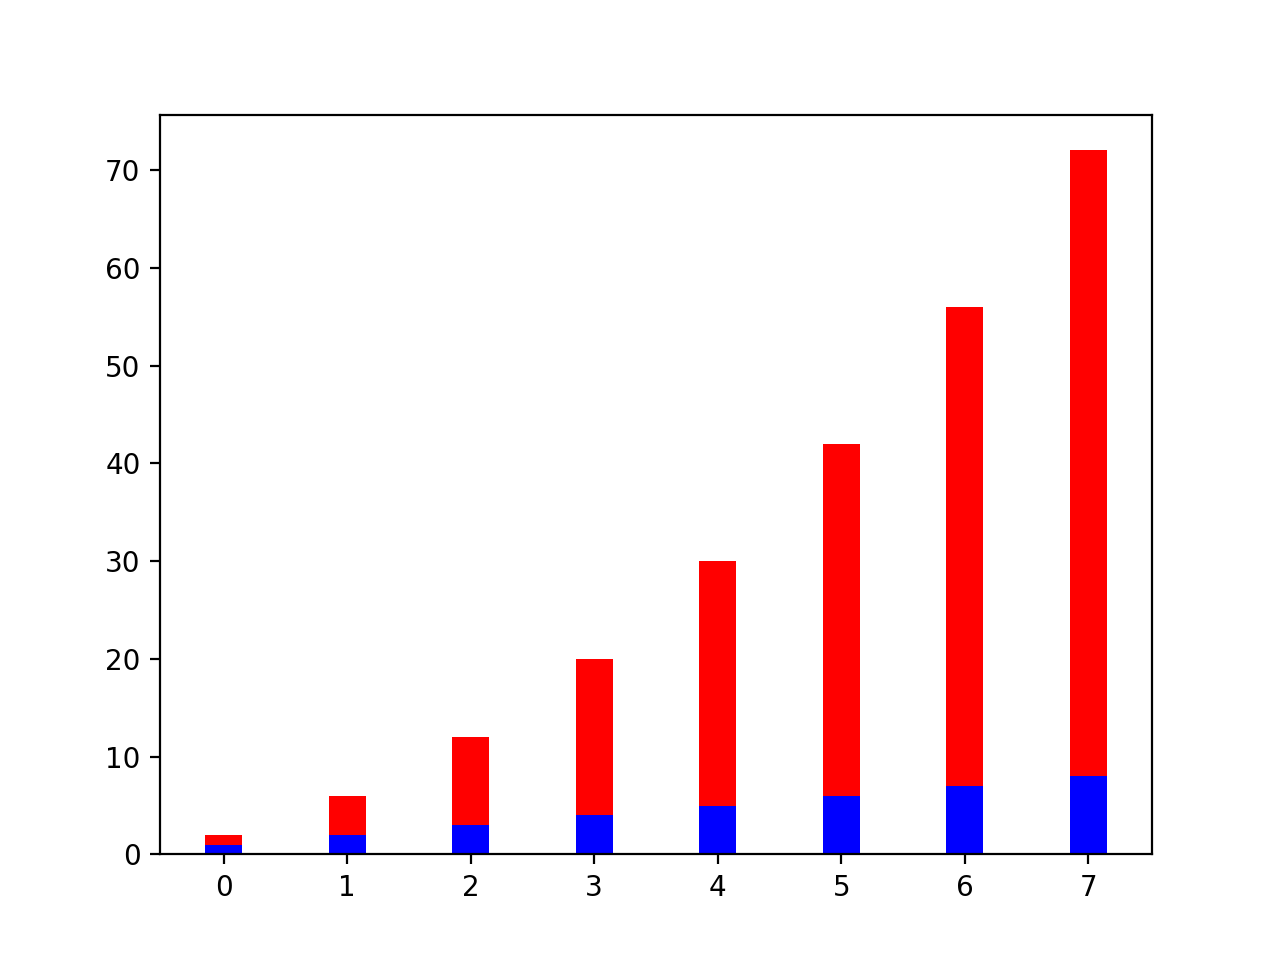

<BarContainer object of 8 artists>

In [52]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color ='blue')
plt.bar(xvals, quadratic_data, width = 0.3, color = 'red', bottom = linear_data)

Or we can change it to horizontal.

<IPython.core.display.Javascript object>


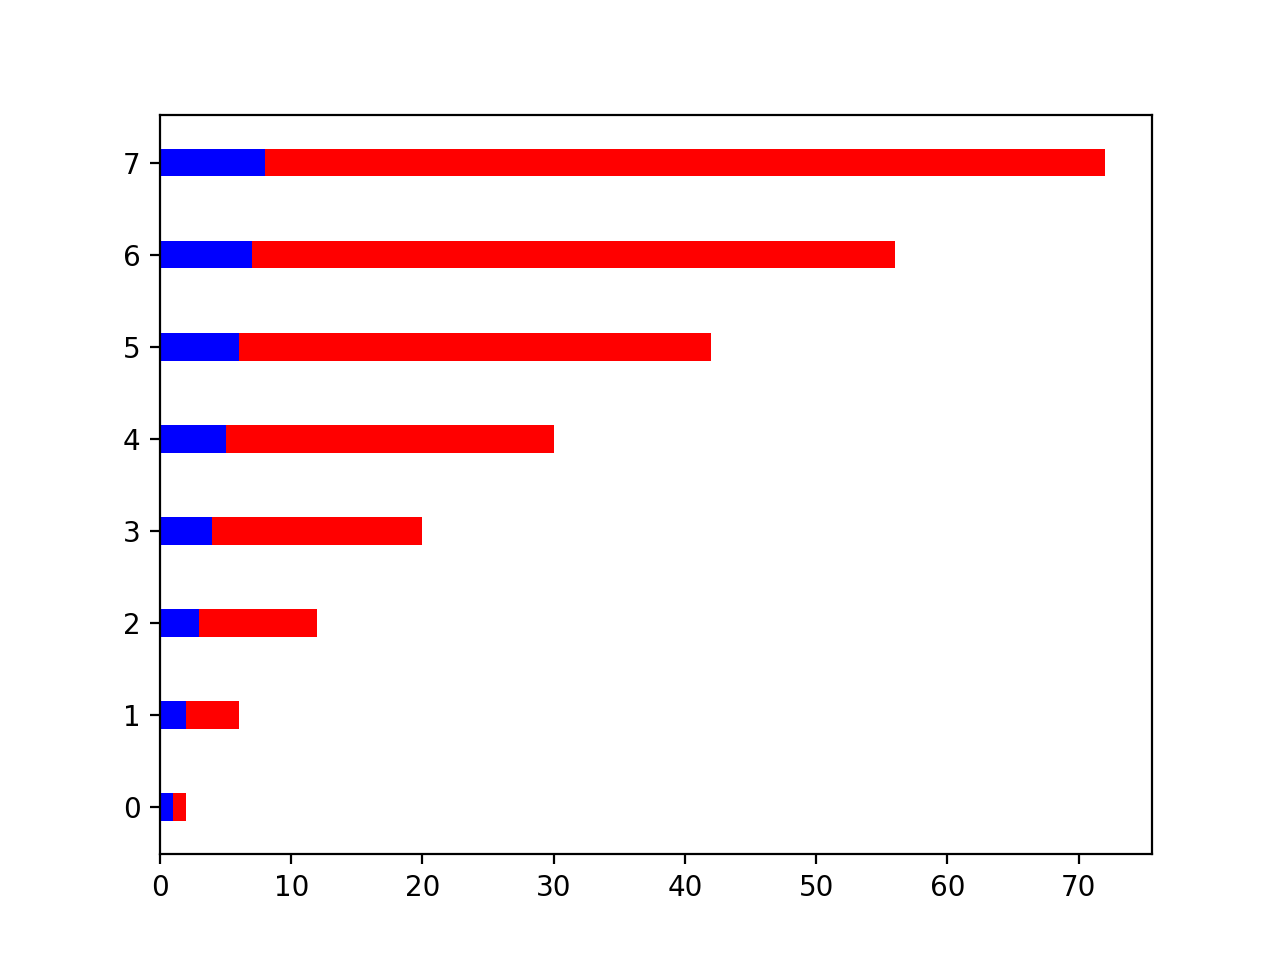

<BarContainer object of 8 artists>

In [54]:
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color ='blue')
plt.barh(xvals, quadratic_data, height = 0.3, color = 'red', left = linear_data)

## De-junkifying a Chart

Let's practice de-junkifying a bar chart.

In [23]:
languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
# generating the y positions
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]


# Creating our bar plot
plt.bar(pos, popularity, align = 'center')
plt.xticks(pos, languages)
plt.ylabel("% Popularity")
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

Text(0.5, 1, 'Top 5 Languages for Math & Data \nby % popularity on Stack Overflow')

Let's remove all the ticks (both axes), and tick labels on the Y axis

<IPython.core.display.Javascript object>


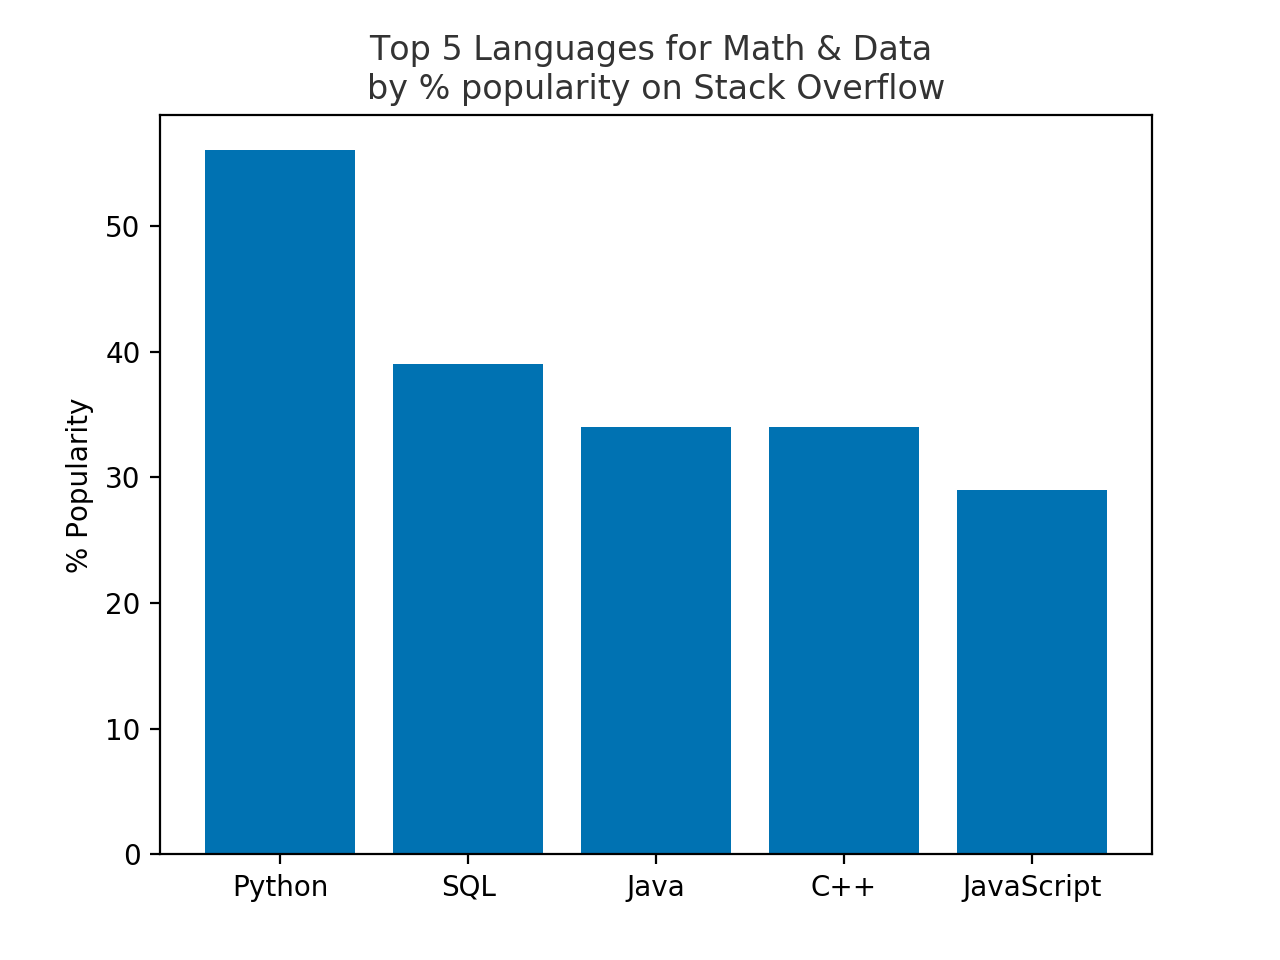

In [24]:
plt.figure()

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.show()

Let's remove the frame around the chart

<IPython.core.display.Javascript object>


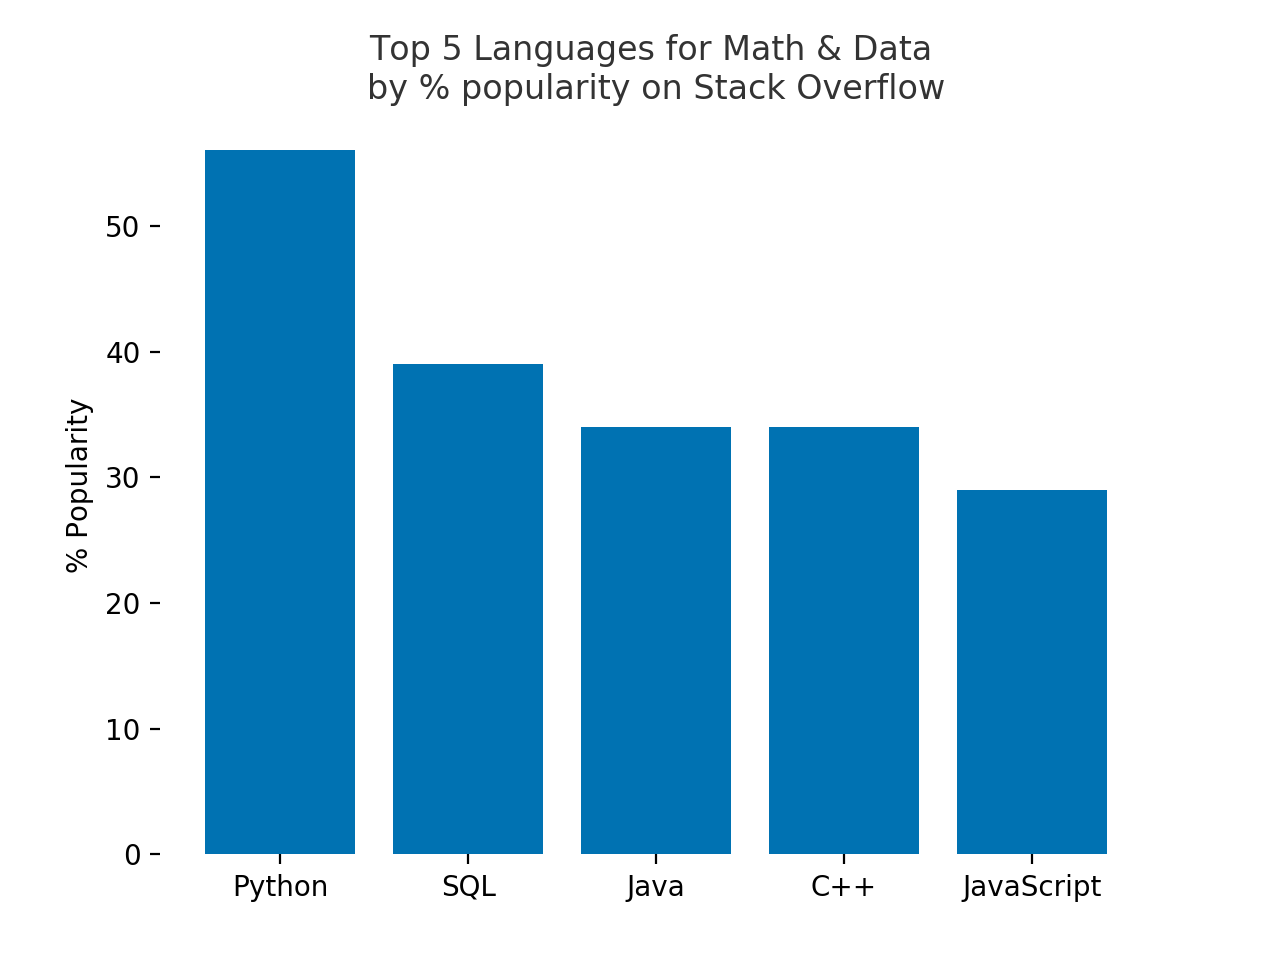

In [25]:
plt.figure()

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

Let's soften the labels by turning them grey and highlight just the Python bar in blue and change the others to grey.

<IPython.core.display.Javascript object>


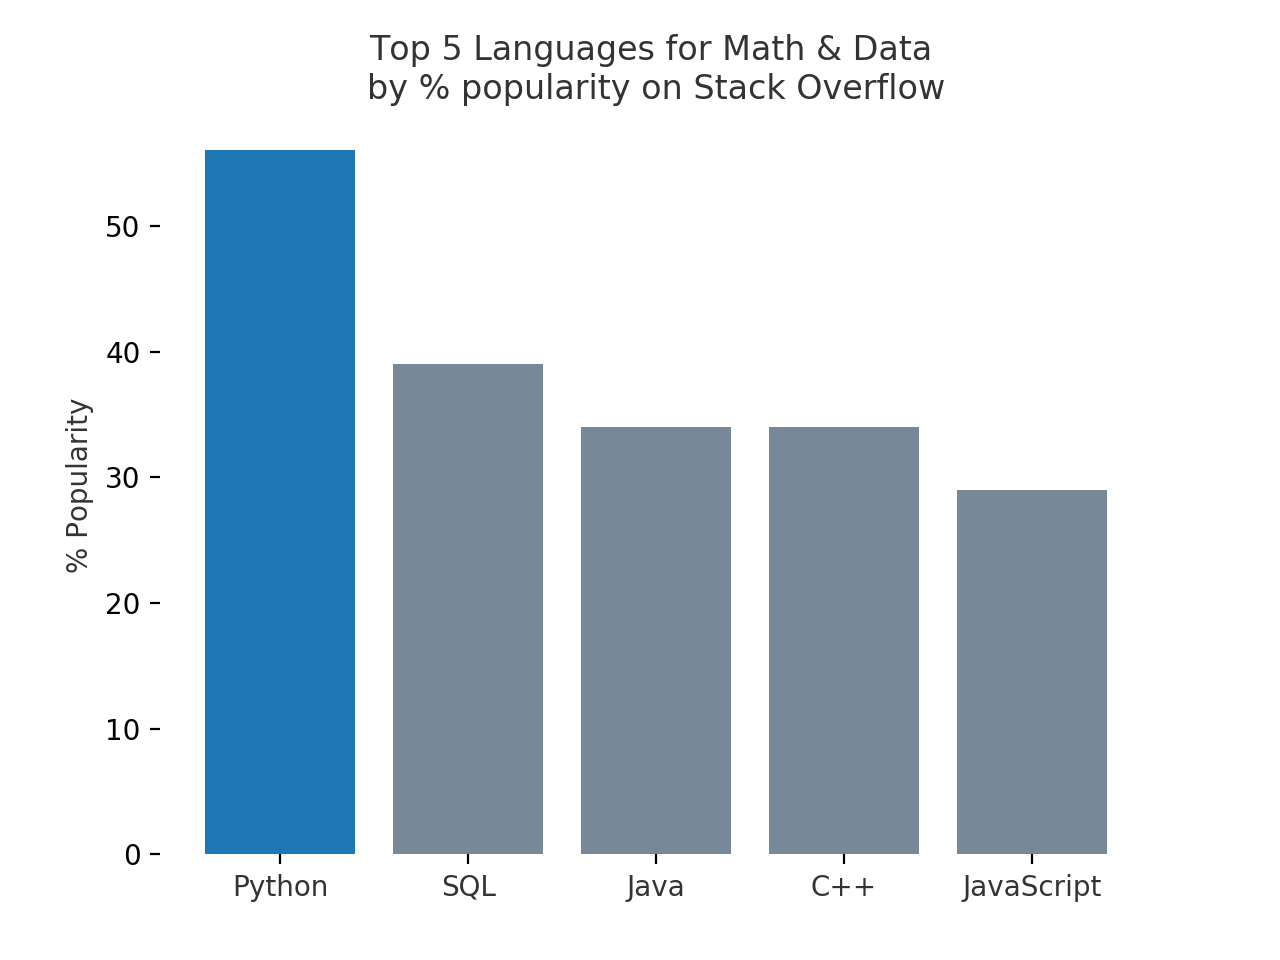

In [26]:
plt.figure()

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# remove all the ticks (both axes), and tick labels on the Y axis
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

Let's add labels to each of the bars so they are easier to read. This means we can remove the y label.

<IPython.core.display.Javascript object>


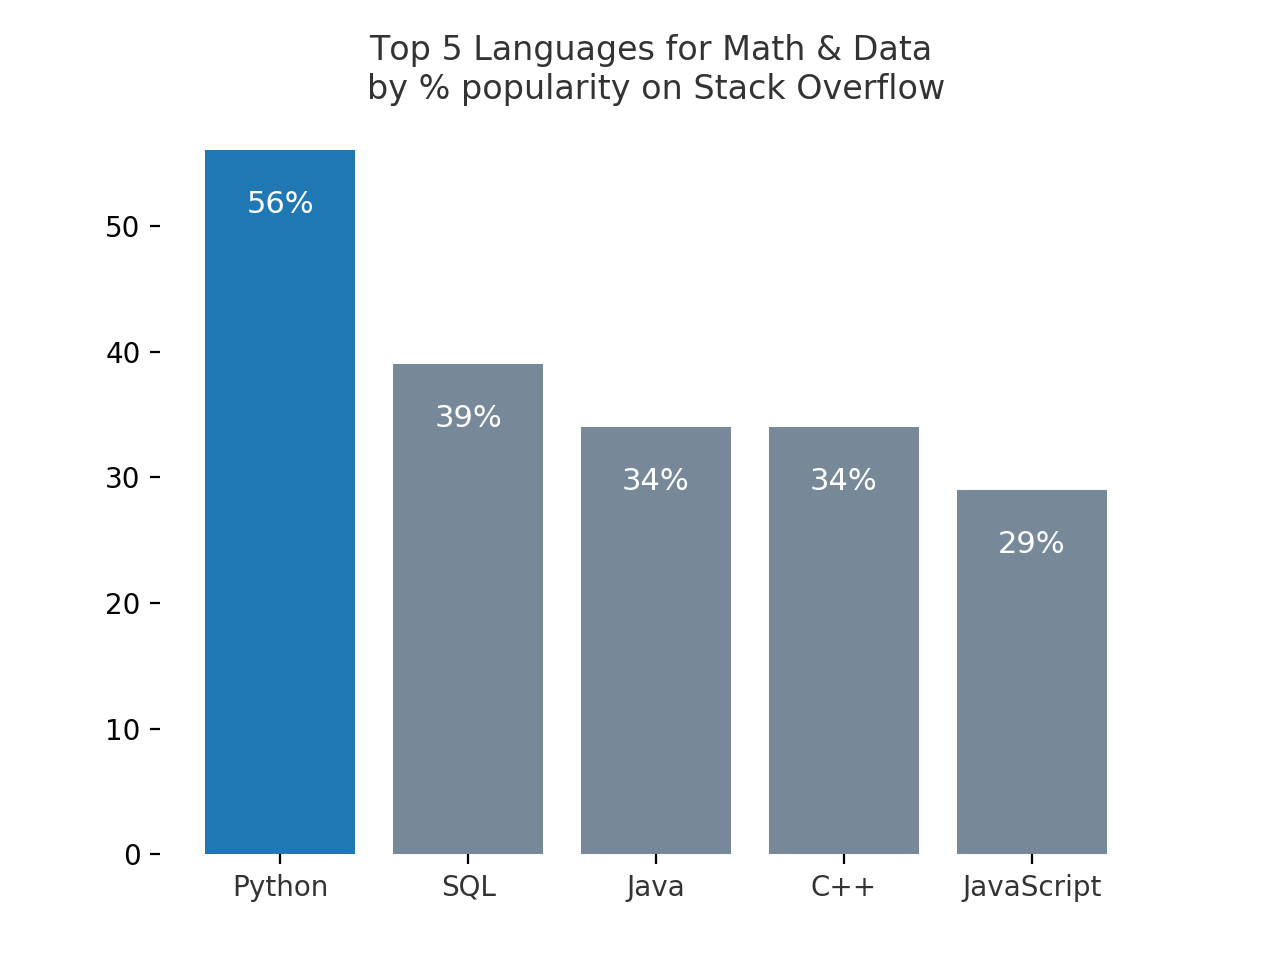

In [27]:
plt.figure()

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# direct label each bar with Y axis values
for bar in bars:
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(bar.get_height())) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

## Seaborn

In [28]:
iris = pd.read_csv("data/iris.csv")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

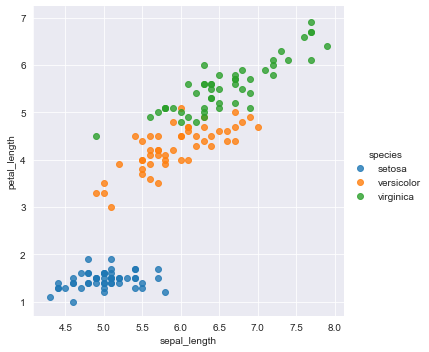

In [13]:
sns.lmplot(x='sepal_length', y='petal_length', data=iris, fit_reg=False, hue='species') 
plt.show()

If we want to continue customizing this plot (like tweaking axes), then we can use matplotlib to do these customizations. 

Let's take a tour of some useful quick seaborn plots.

### Jointplot 
Produces a scatterplot and histograms

<IPython.core.display.Javascript object>


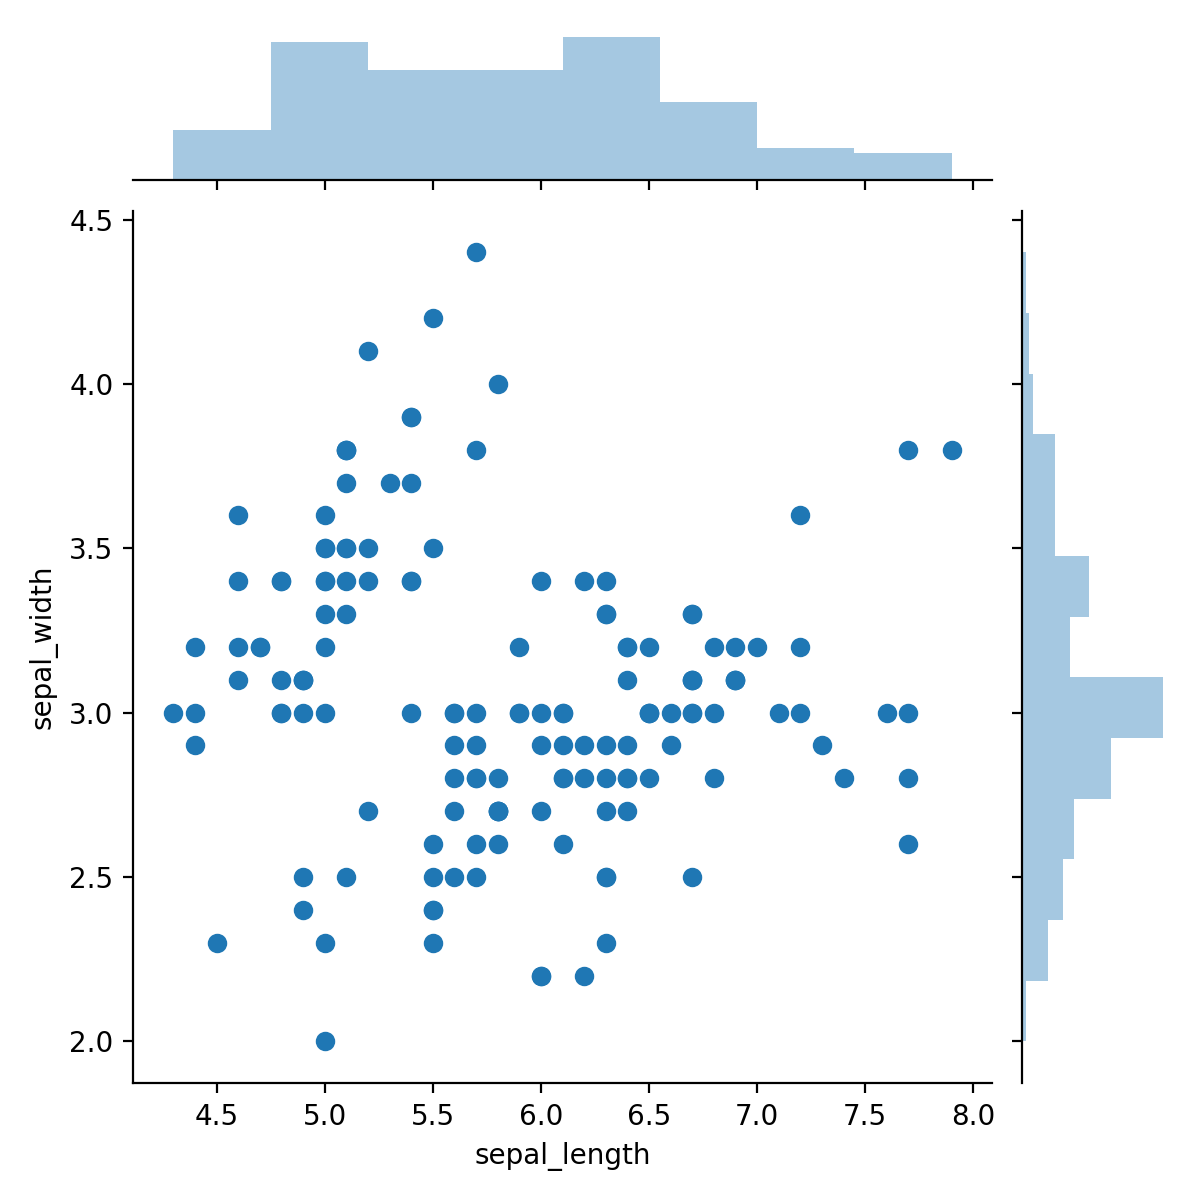

In [17]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.show()

We can look at it with hex-shaped bins using the `hex` in the `kind` parameter.

<IPython.core.display.Javascript object>


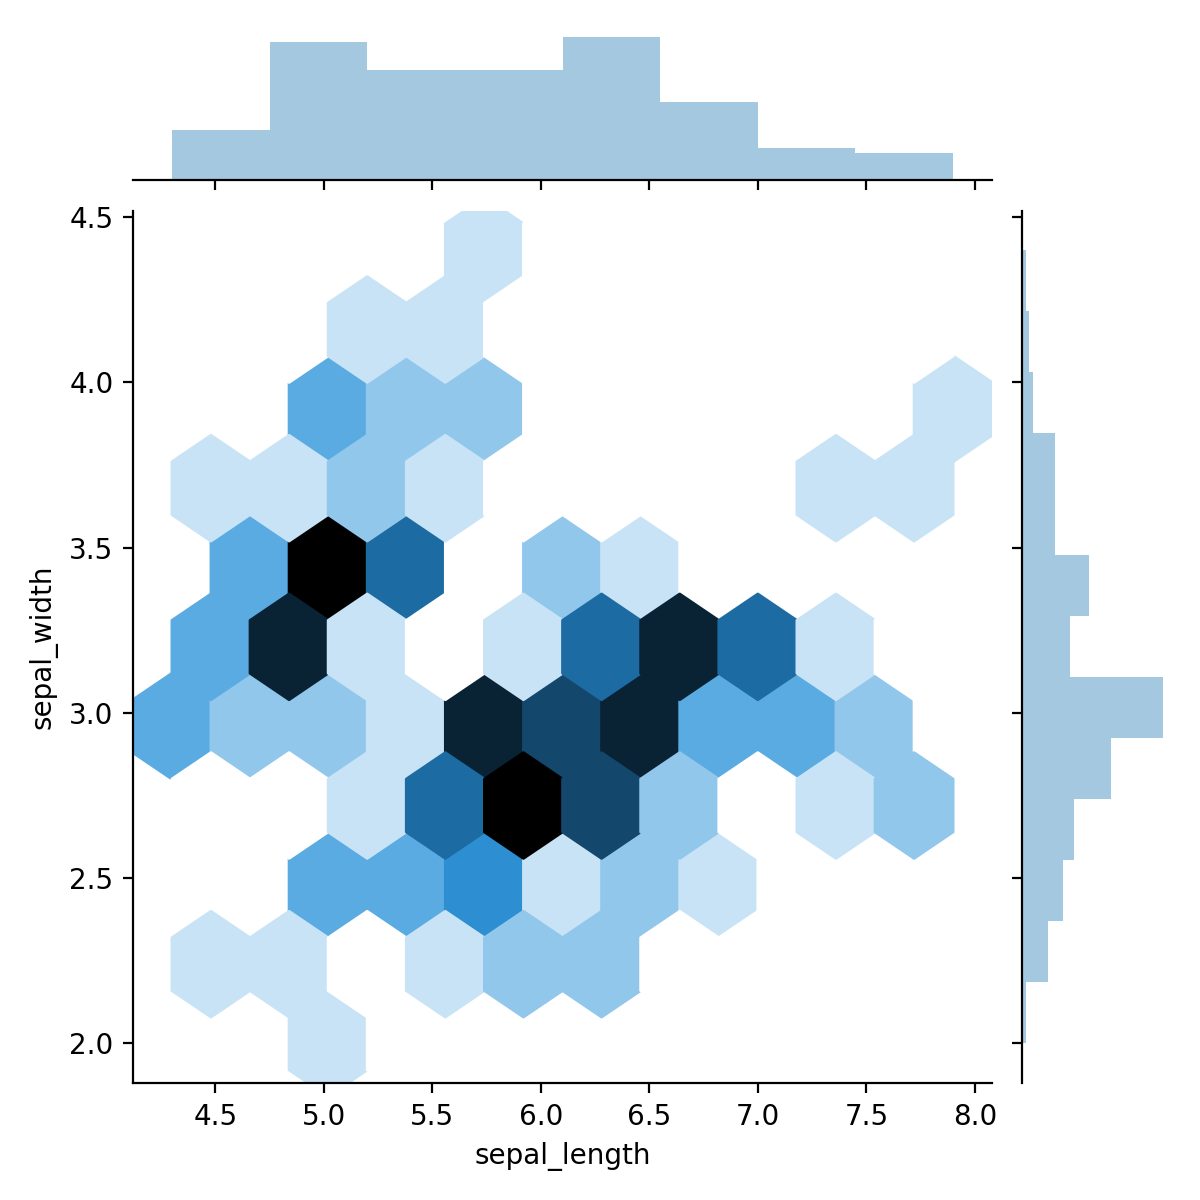

In [18]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind='hex')
plt.show()

In [134]:
sns.set_style('white')

<IPython.core.display.Javascript object>


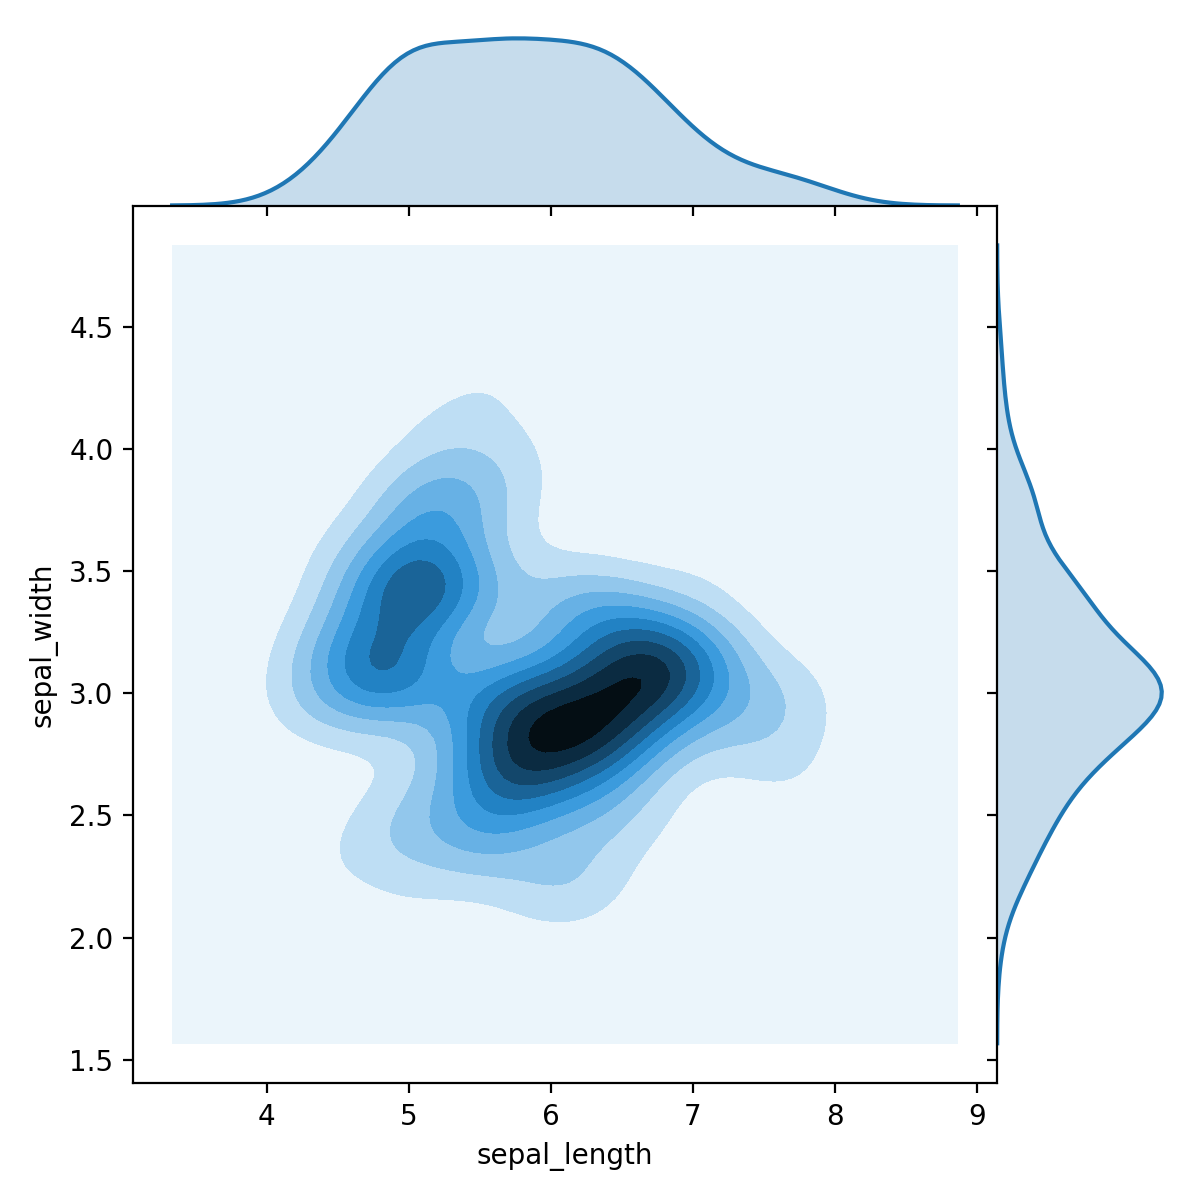

In [19]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind = 'kde', space = 0)
plt.show()

We can still tweak plots using matplotlib (seaborn will return either axes or seaborn grid objects, which matplotlib can be used to tweak).

<IPython.core.display.Javascript object>


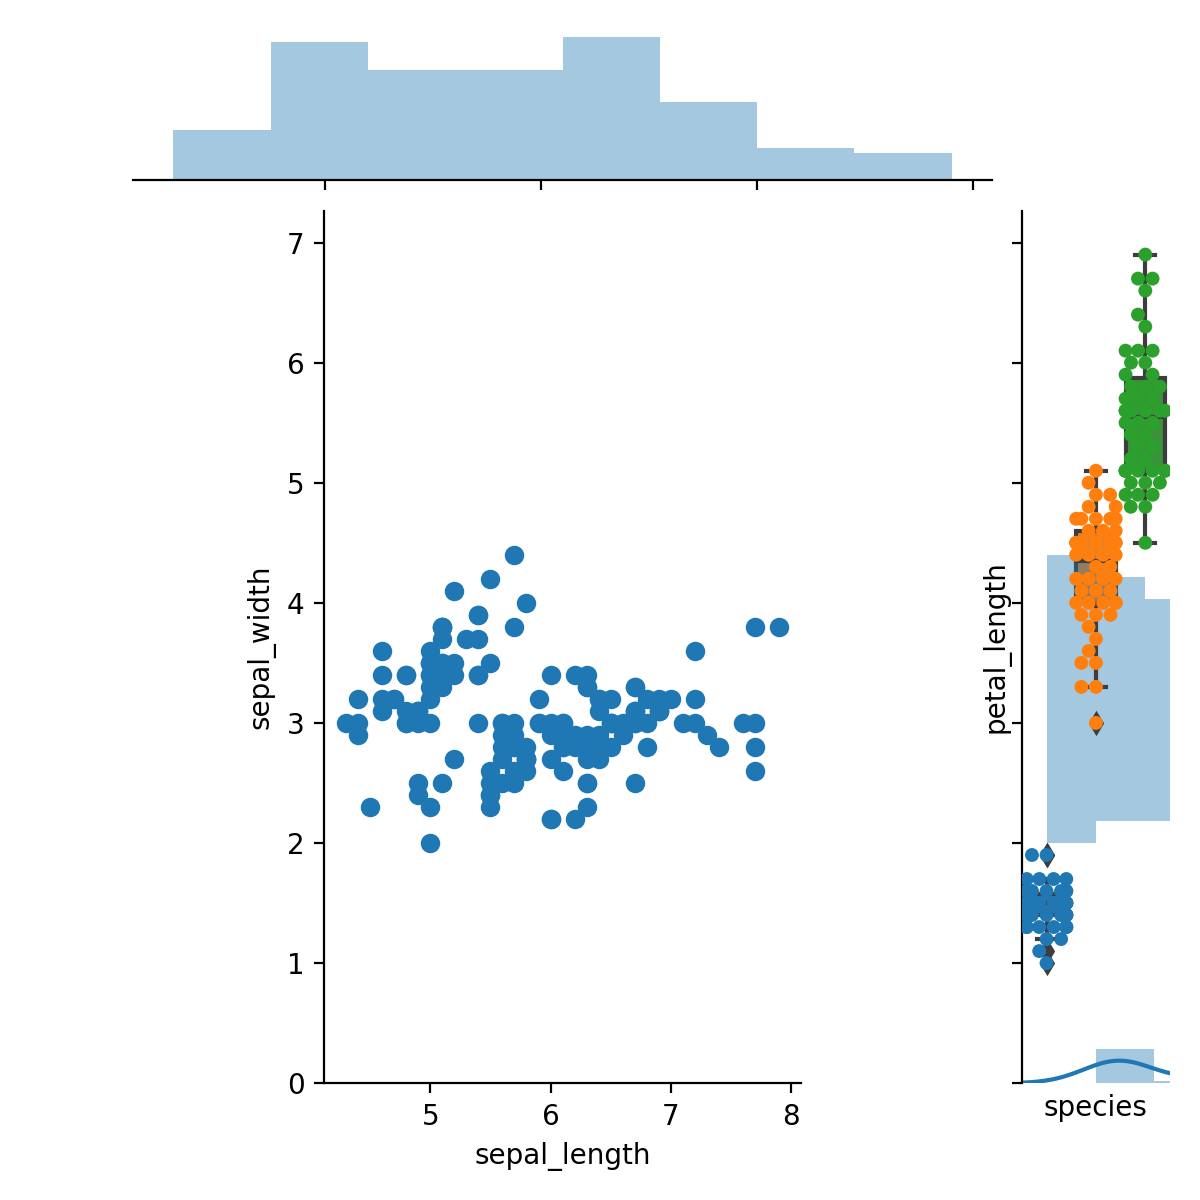

In [20]:
grid = sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
grid.ax_joint.set_aspect('equal')

### Histogram

In [21]:
sns.distplot(iris.petal_length)
plt.show()

### Boxplot

In [22]:
sns.boxplot(x="species", y="petal_length", data=iris )
plt.show()

### Swarmplot
It's like a histogram for categorical data.

In [23]:
sns.swarmplot(x="species", y="petal_length", data=iris)
plt.show()

### Violinplots 
Show density of data. It's like a more informative version of a boxplot. It has a rotated kernal density estimation on its side. (This can be helpful for showing multimodality)

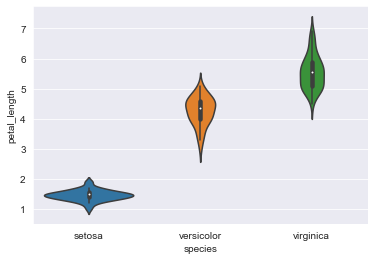

In [17]:
sns.violinplot(x="species", y="petal_length", data=iris)
plt.show()

<IPython.core.display.Javascript object>


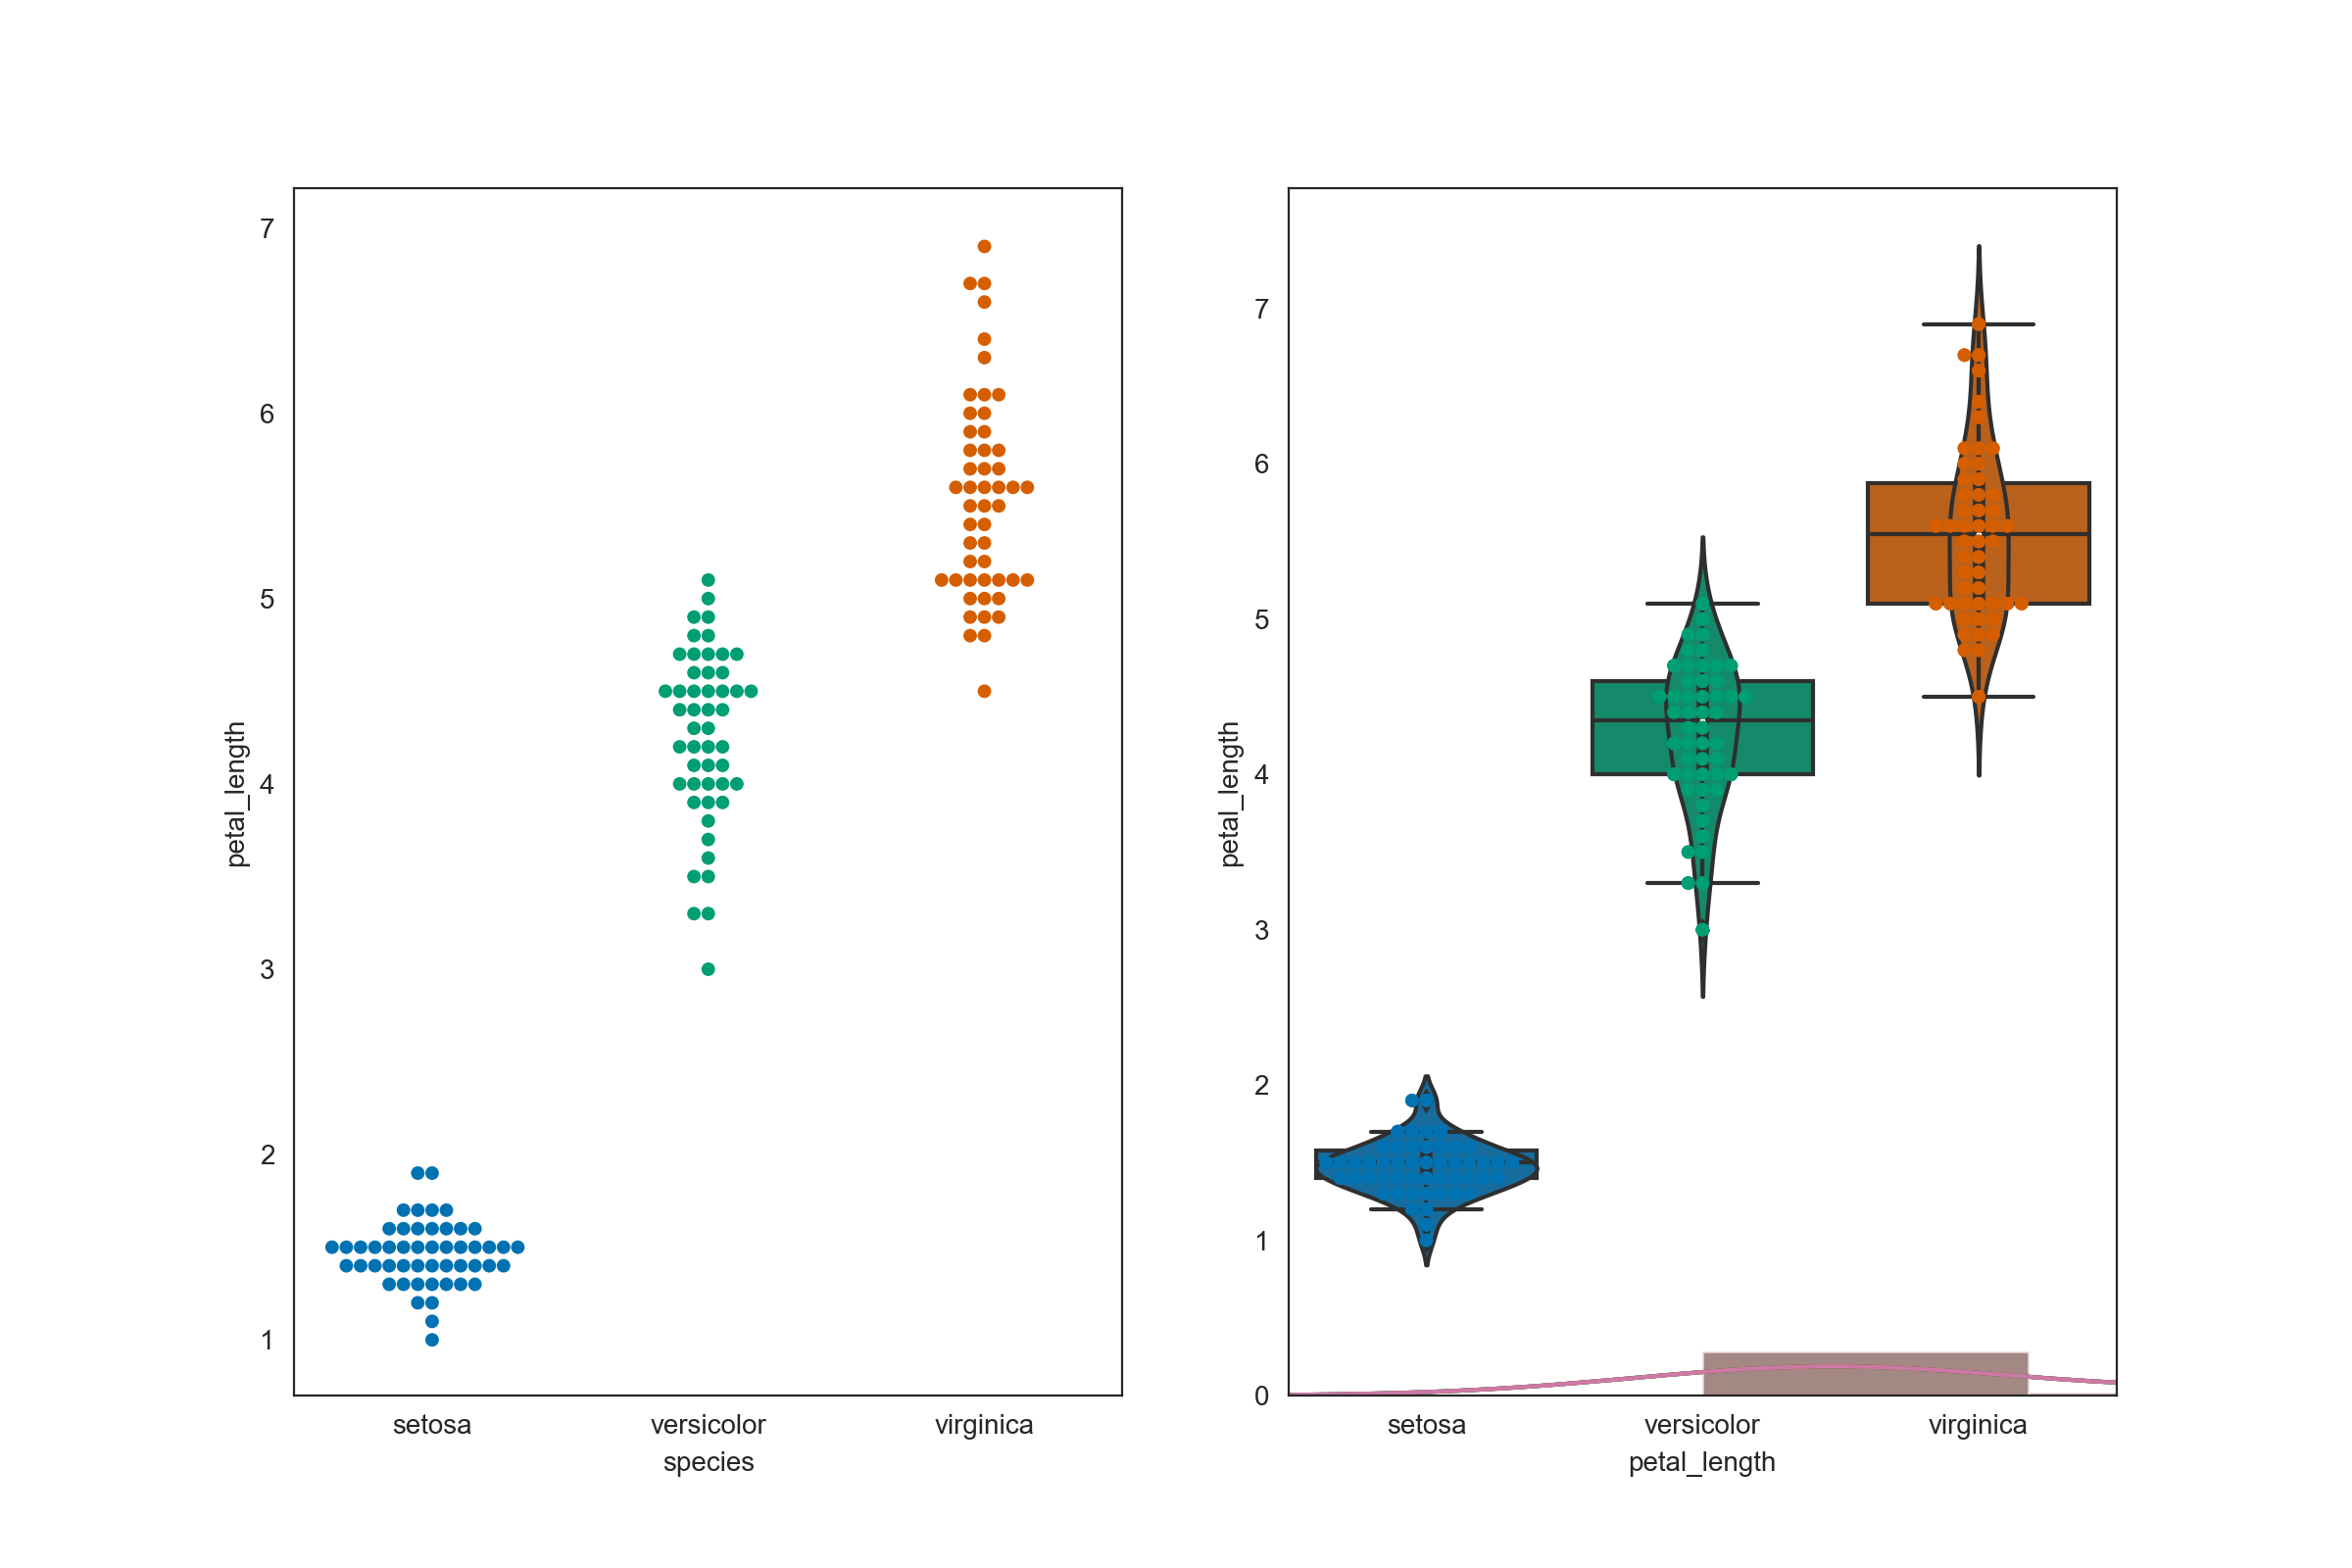

In [140]:
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.swarmplot(x="species", y="petal_length", data=iris)
plt.subplot(122)
sns.violinplot(x="species", y="petal_length", data=iris)

### Seaborn themes
Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.

#### Change the theme to 'whitegrid' for a violin plot for iris petal length

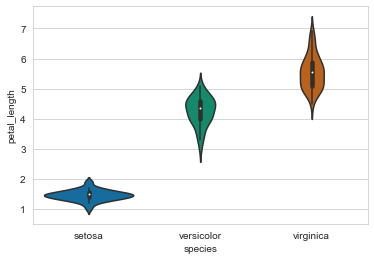

In [183]:
sns.set_style('whitegrid')
sns.violinplot(x='species', y='petal_length', data=iris)

In [181]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [110]:
plt.style.use('seaborn-colorblind')

### Pairplot 
Shows relationships between all variables. I find this one super useful!

<IPython.core.display.Javascript object>


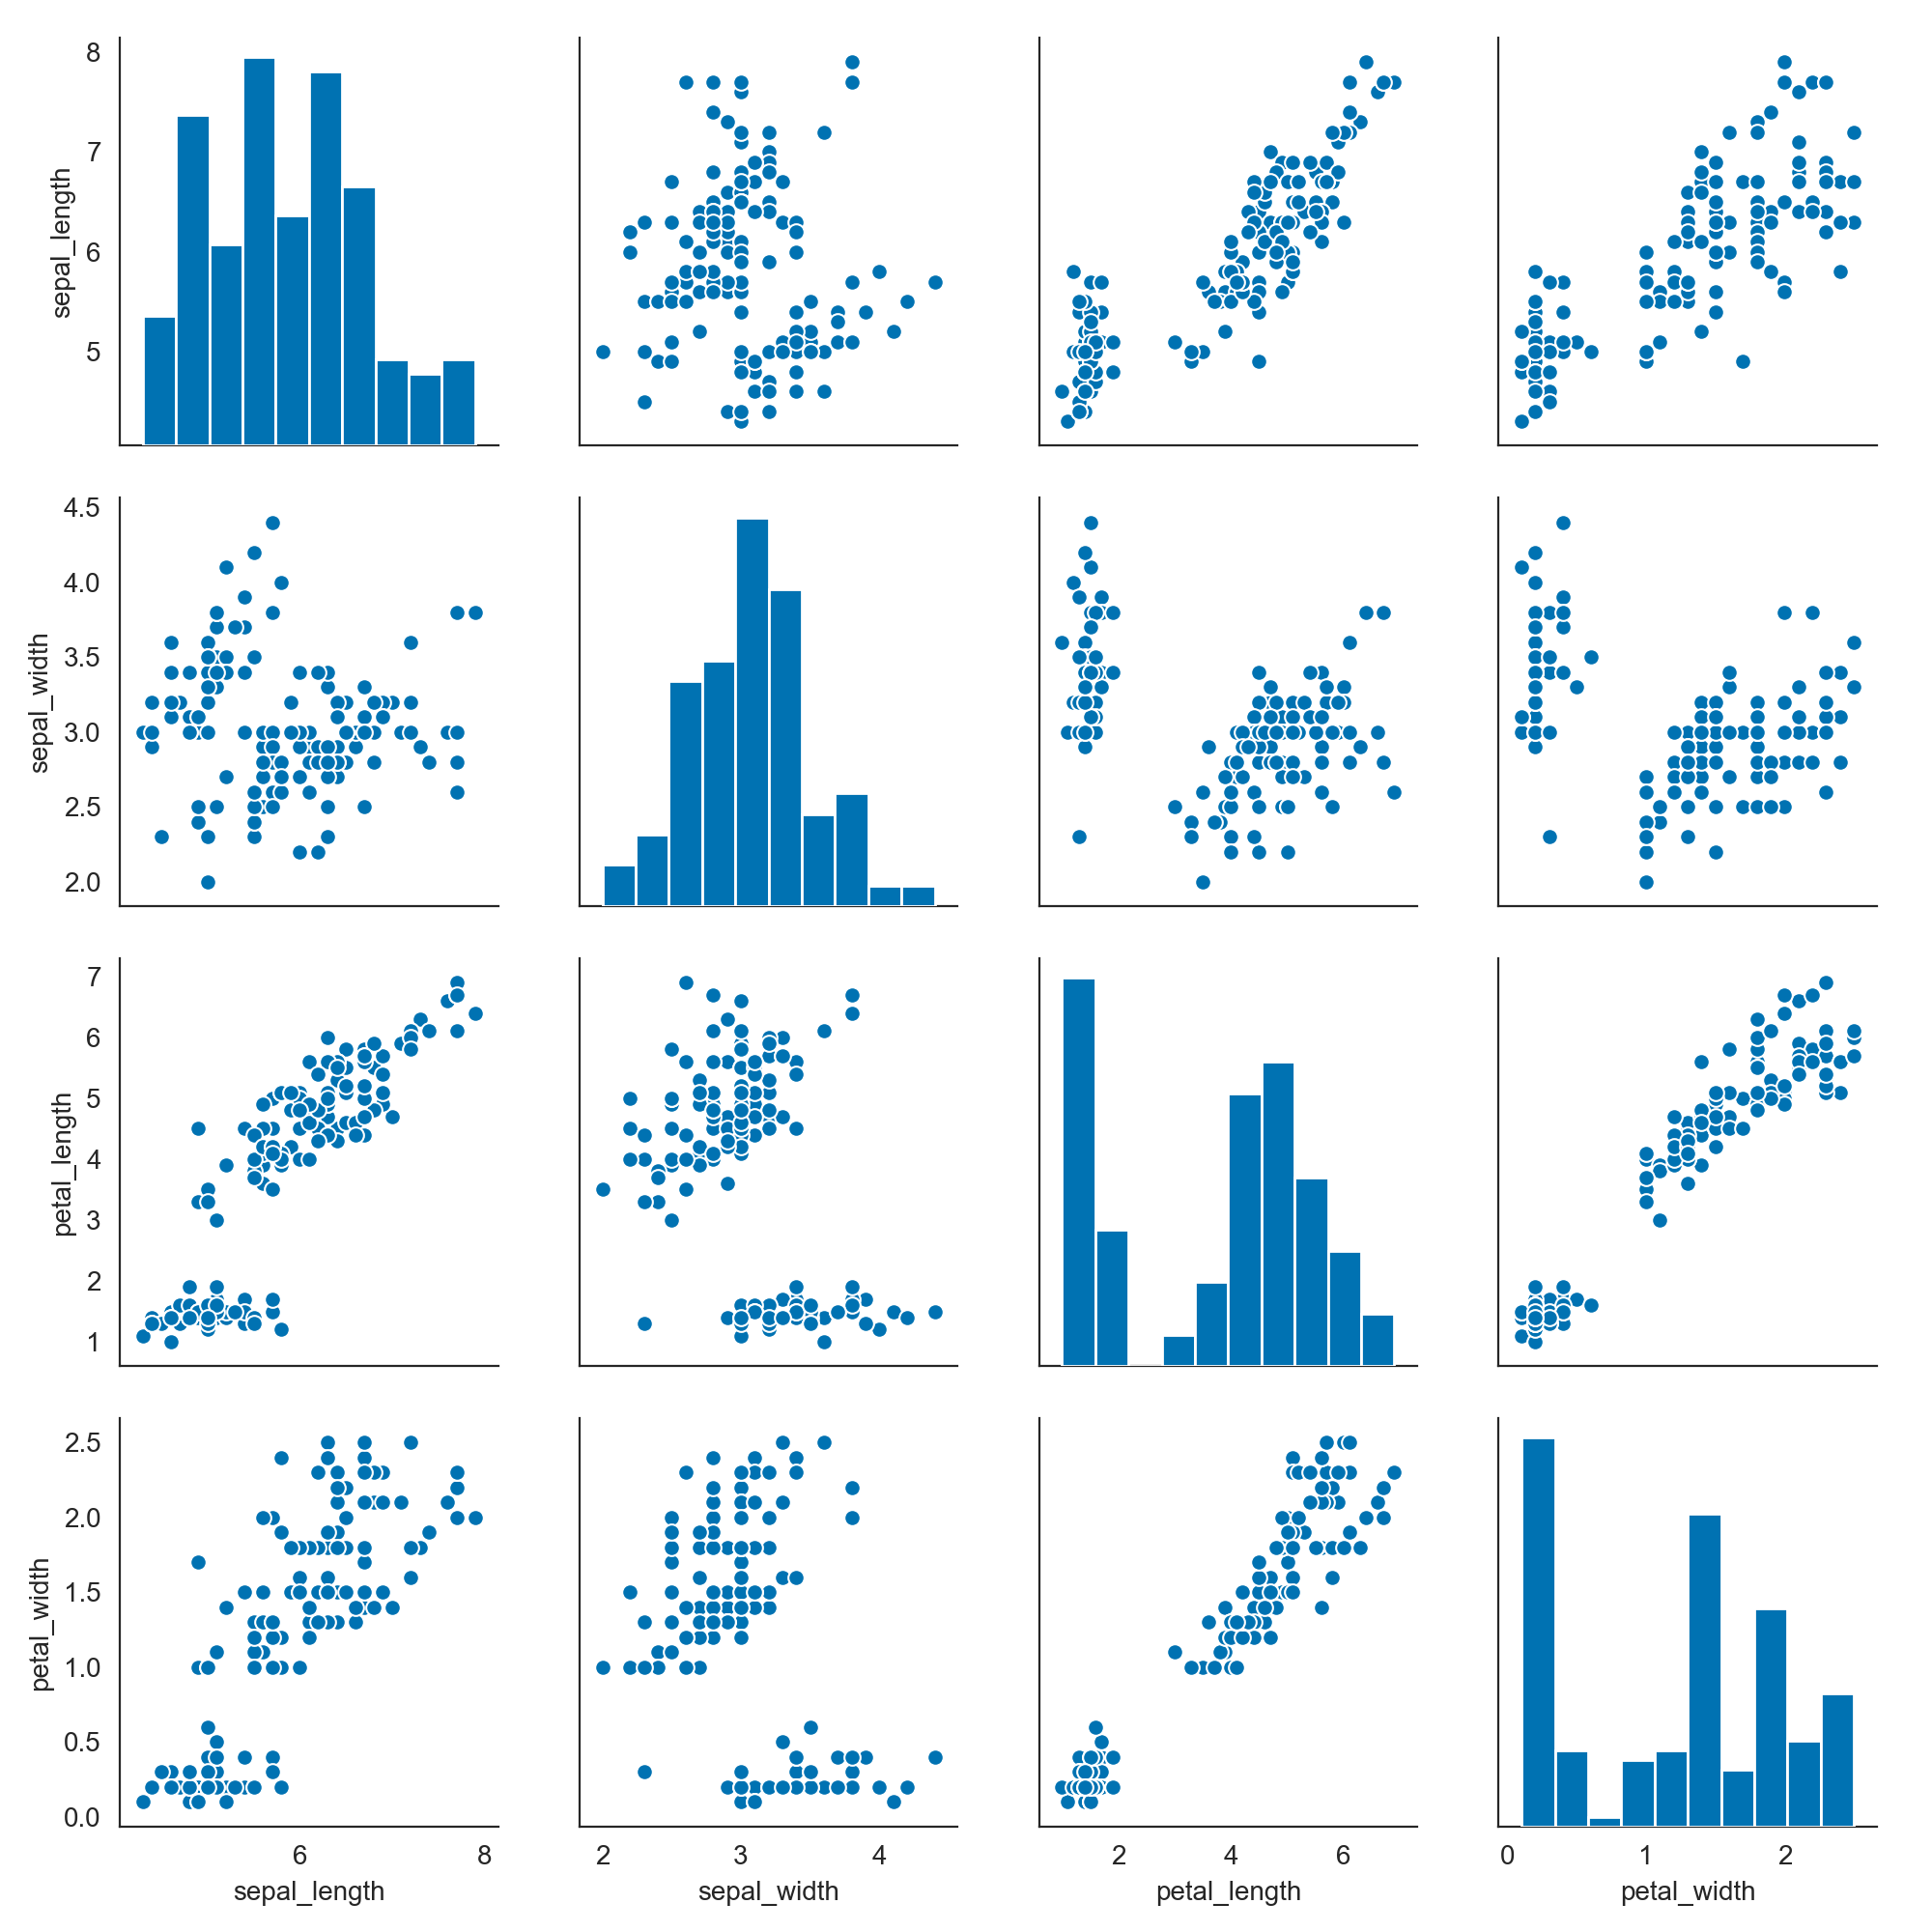

In [136]:
sns.pairplot(iris)
plt.show()

<IPython.core.display.Javascript object>


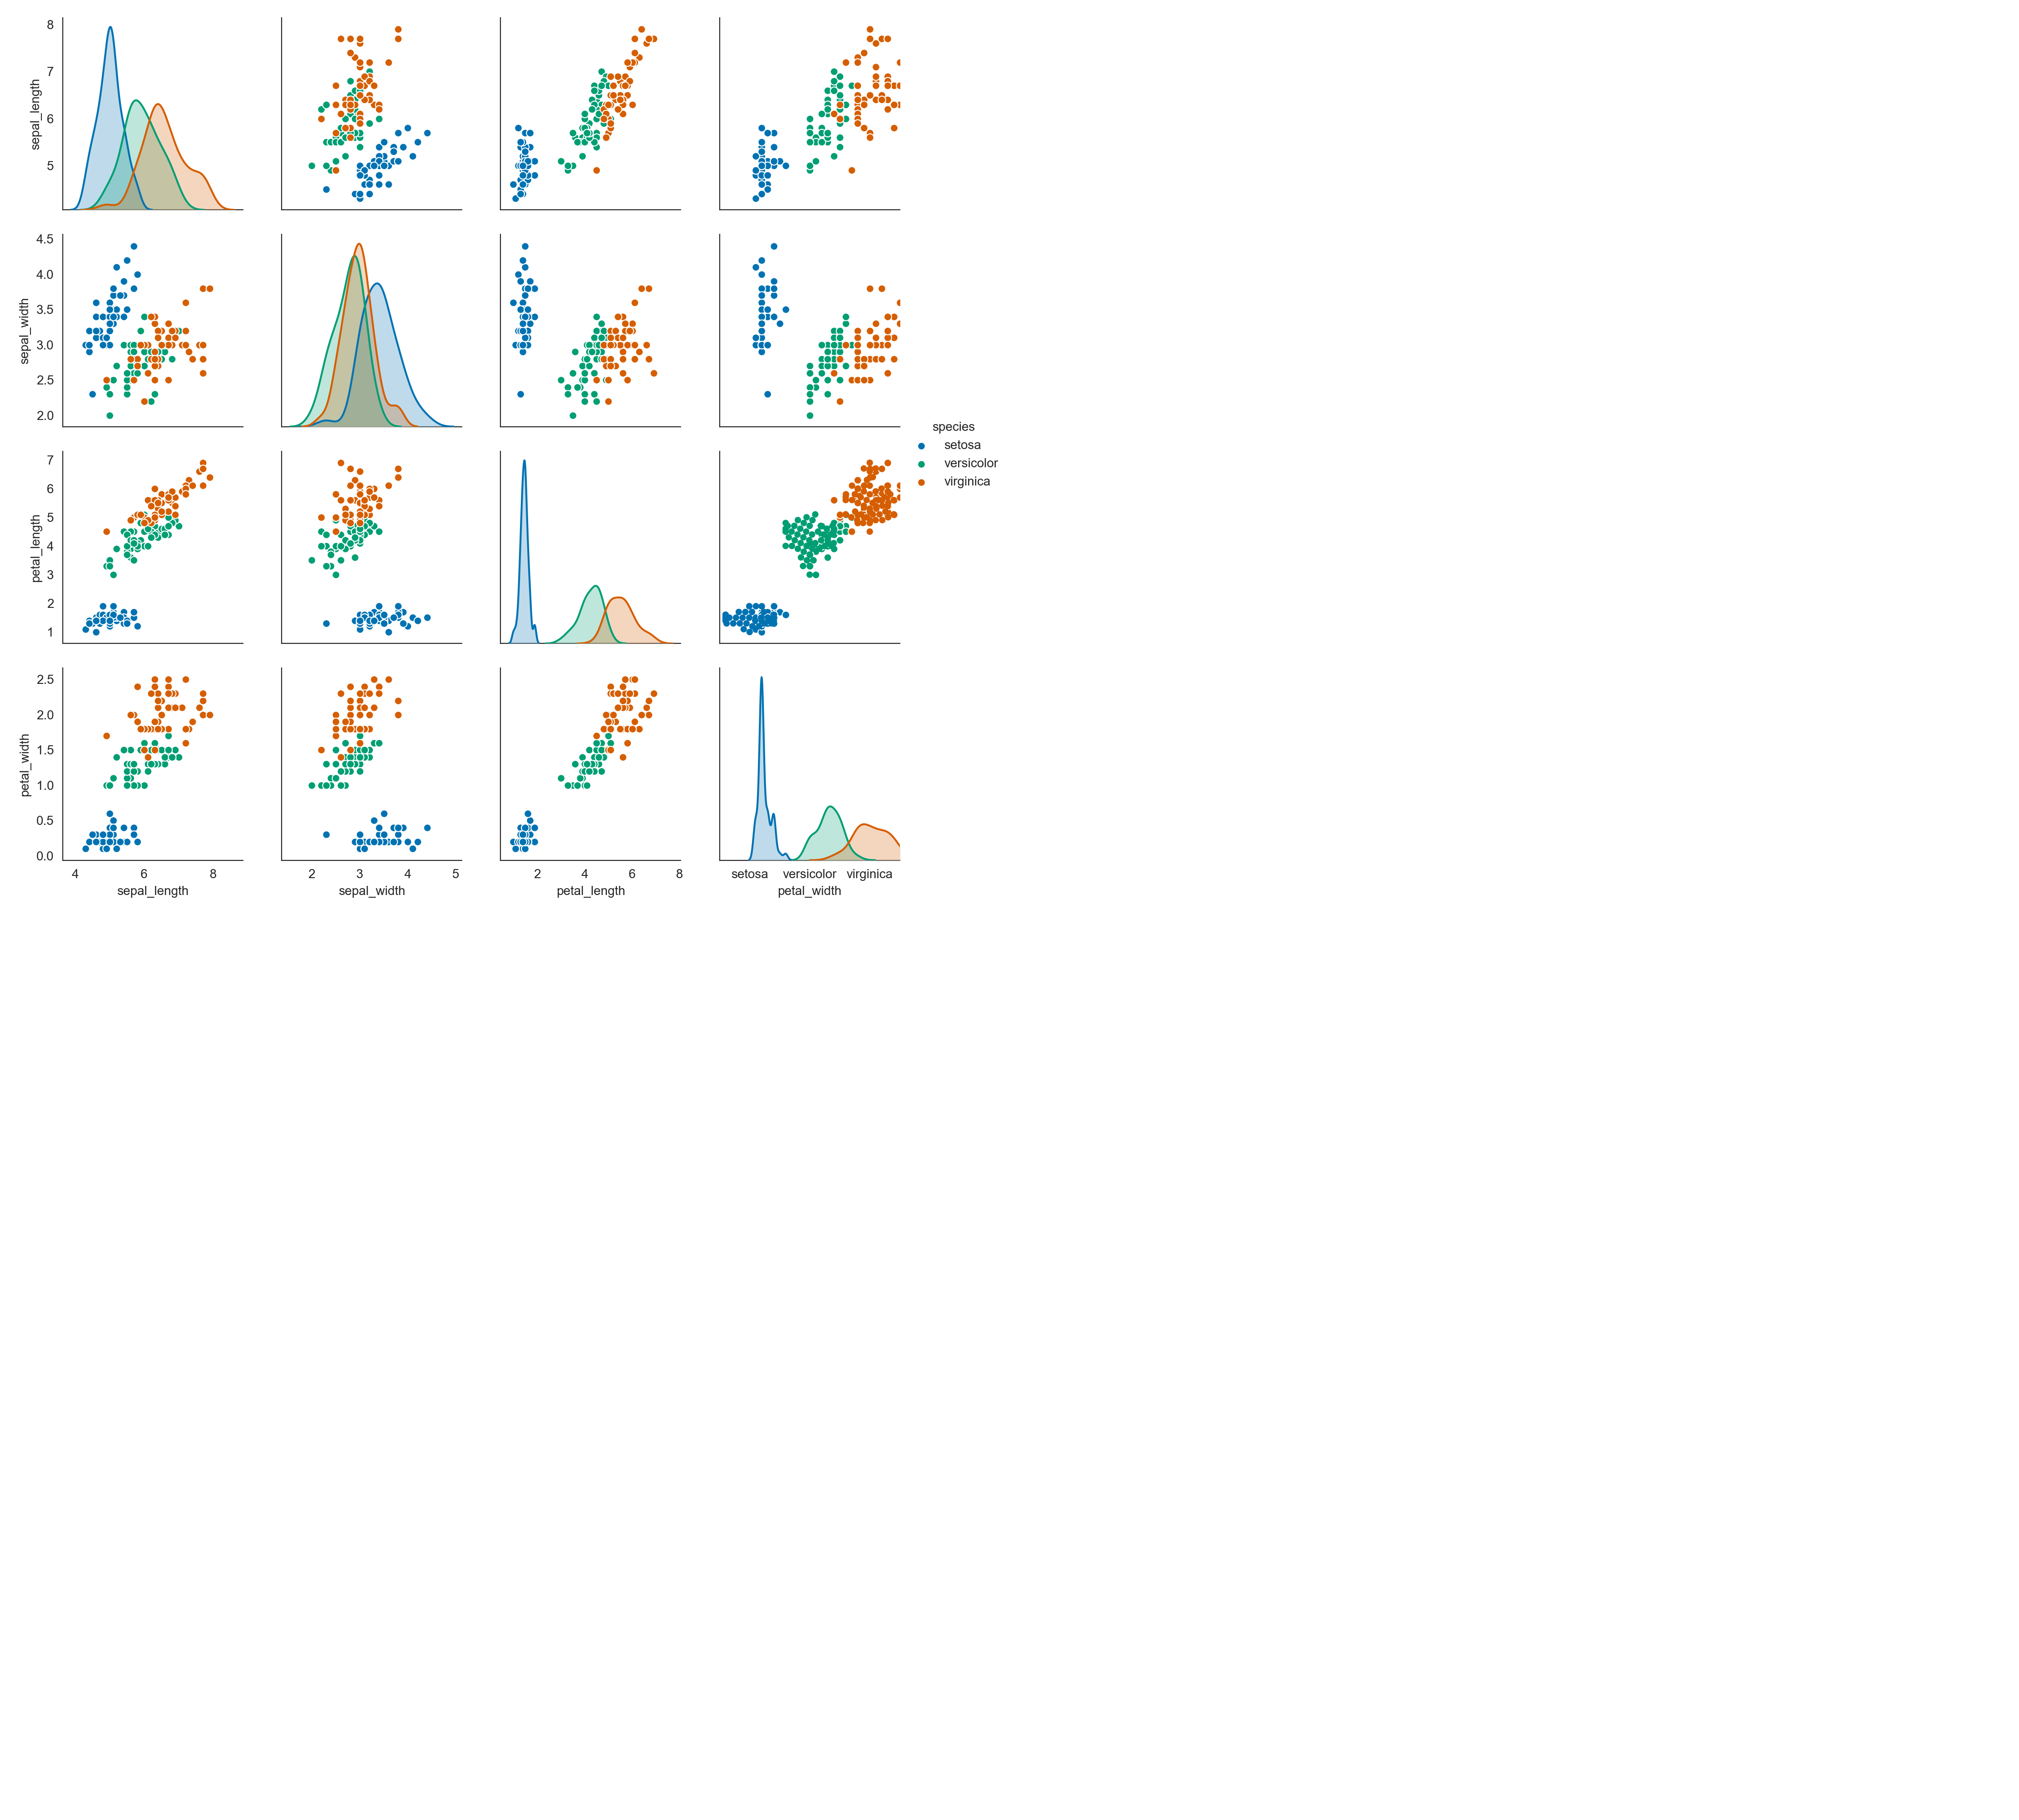

In [137]:
sns.pairplot(iris, hue="species", diag_kind = "kde")
plt.show()

### Heatmap

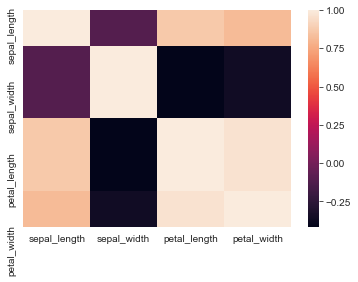

In [20]:
sns.heatmap(iris.corr())
plt.show()

<IPython.core.display.Javascript object>


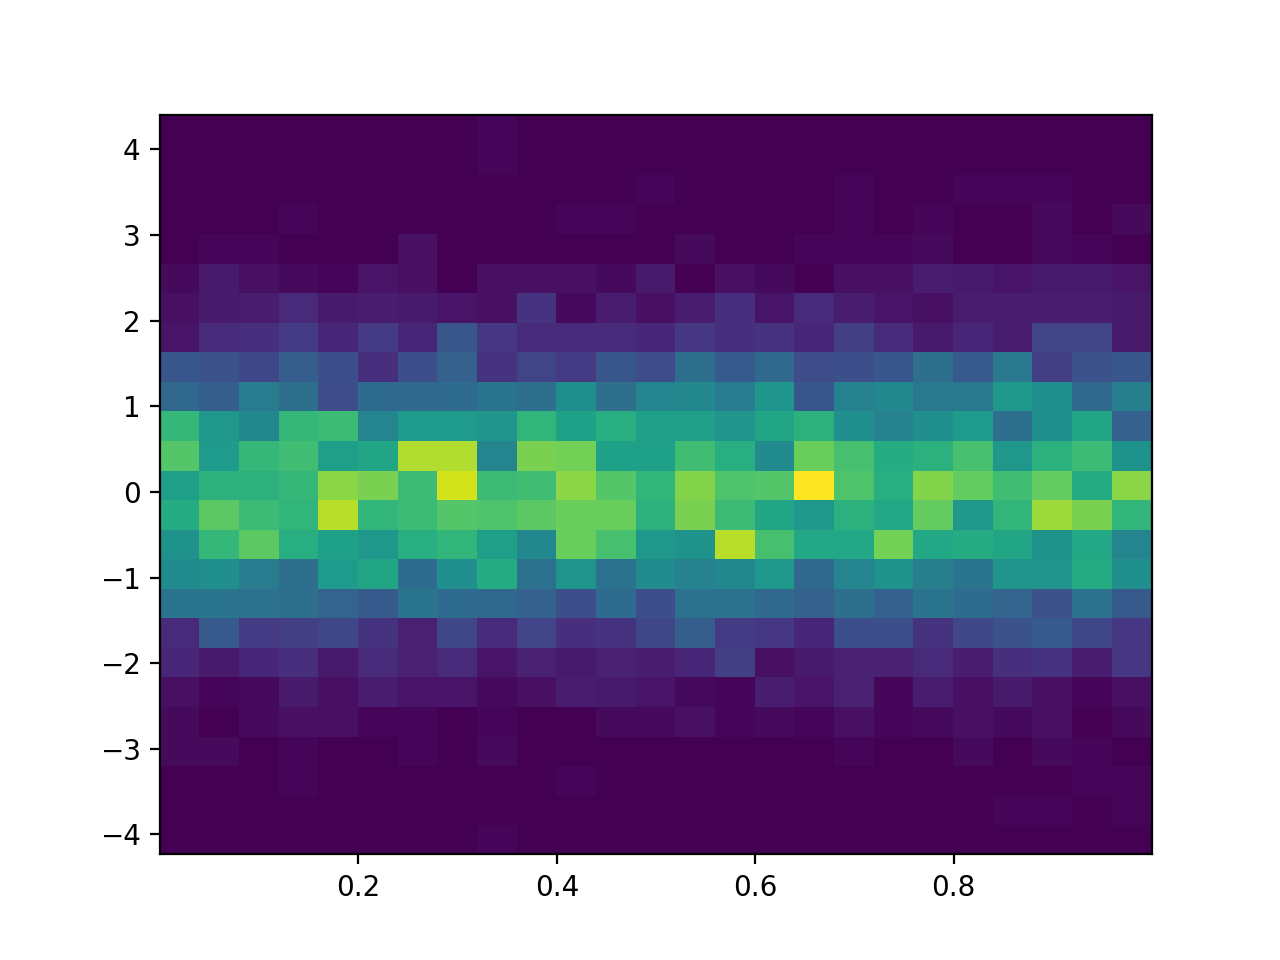

In [93]:
plt.figure()
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
_ = plt.hist2d(X, Y, bins = 25)

/Users/nicholebennett/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


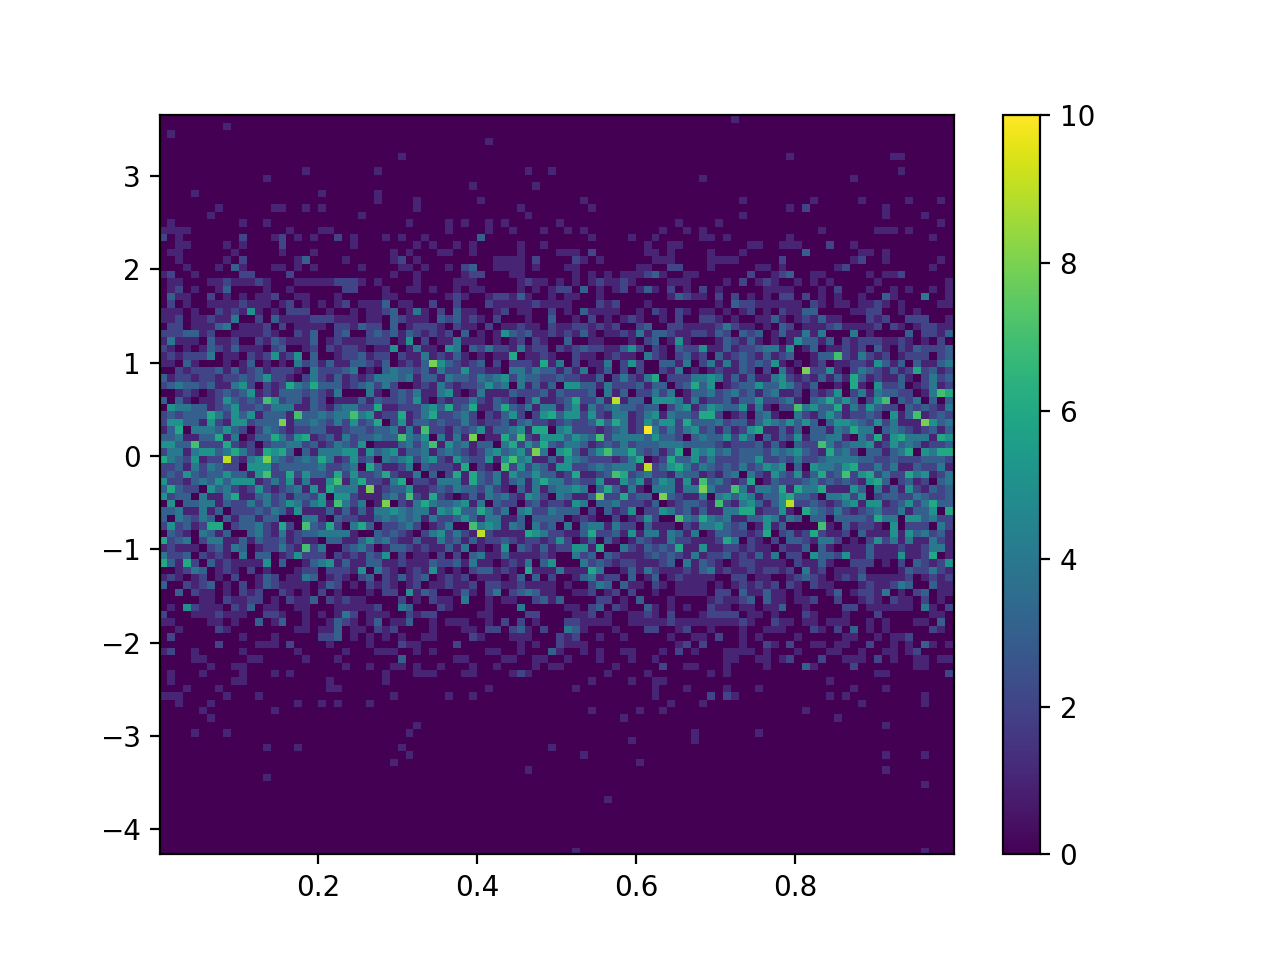

In [94]:
plt.figure()
Y = np.random.normal(loc = 0.0, scale = 1.0, size = 10000)
X = np.random.random(size = 10000)
_ = plt.hist2d(X, Y, bins = 100)

In [95]:
plt.colorbar()

### Animation

In [223]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)    

In [224]:
def update(curr):
    if curr == n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4, 4, 0, 30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3, 27])

<IPython.core.display.Javascript object>


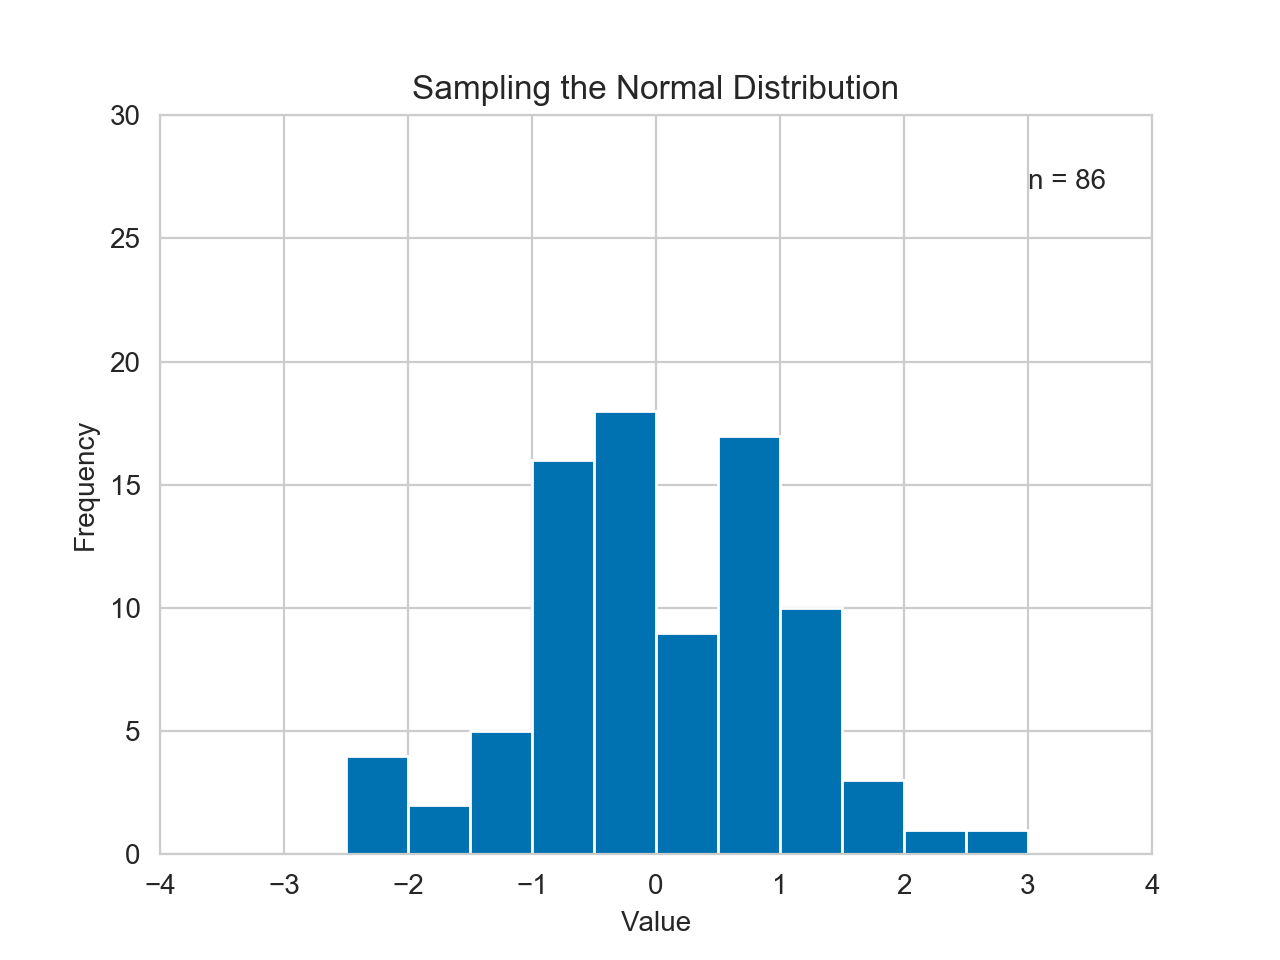

In [225]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

### Interactivity

This uses an event listener (some background on how these work might be helpful if you want to dive deeper).

<IPython.core.display.Javascript object>


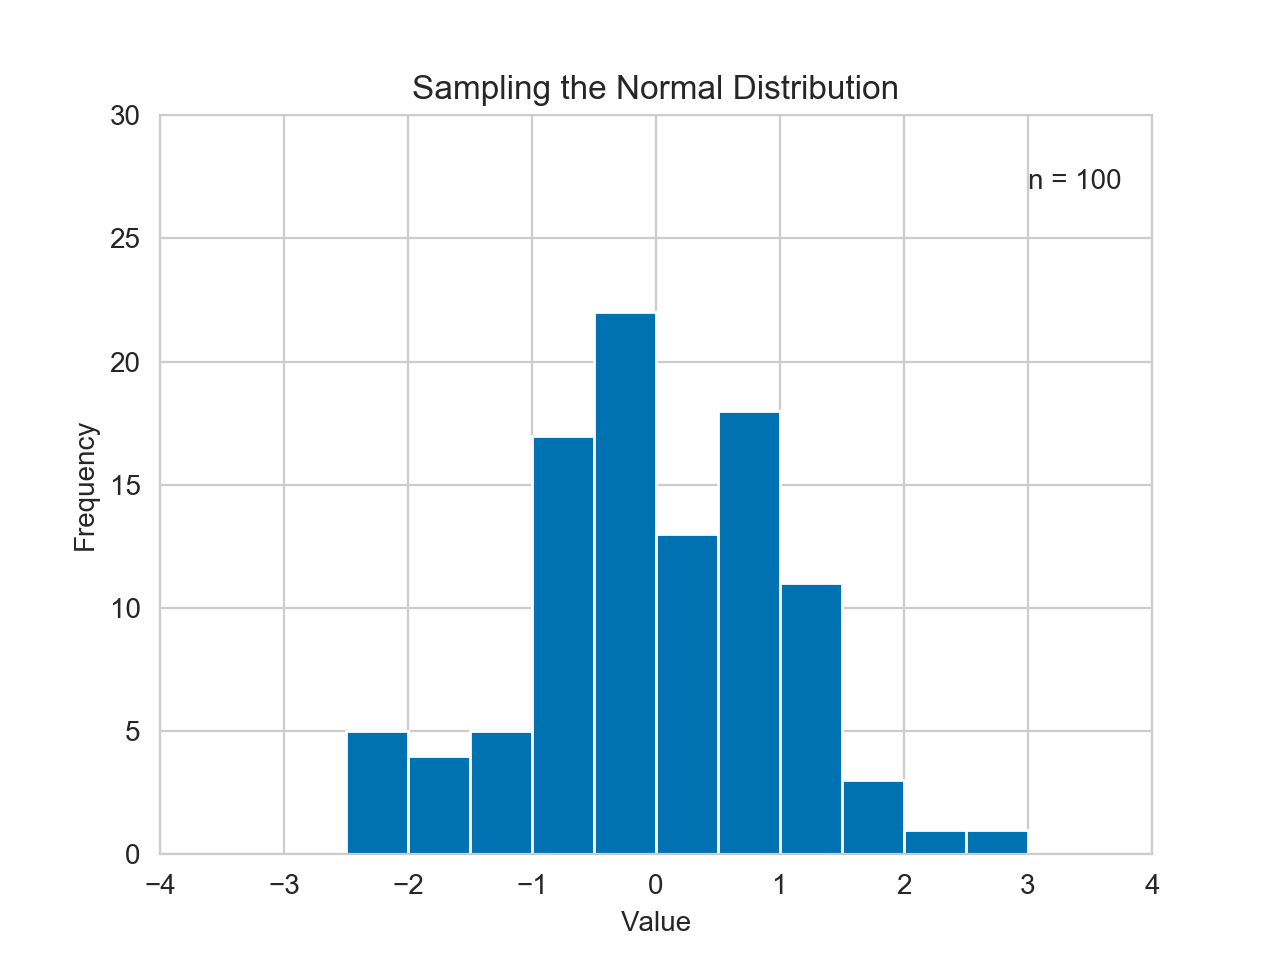

In [226]:
plt.figure()
data = np.random.rand(10)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} and data {},{}'.format(event.x, event.y, '\n', event.xdata, event.ydata))
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [187]:
from random import shuffle

origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']
shuffle(origins)
df = pd.DataFrame({'height': np.random.randn(10), 'weight': np.random.randn(10), 'origin': origins})
df

height    weight   origin
0  0.311309 -0.933180  Germany
1 -0.772889 -0.274411       UK
2  2.056672  0.021759      USA
3 -0.509938 -0.001428   Mexico
4 -0.806586  0.820165    China
5  1.781085 -2.174542    Chile
6 -0.545454  0.503894    India
7 -0.014437  0.578287     Iraq
8  1.069980 -1.234392   Brazil
9  0.235877 -0.452228   Canada

Text(0.5, 0, 'Height')

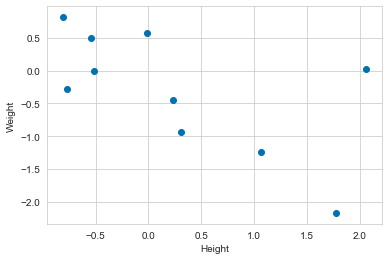

In [189]:
plt.figure()
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [190]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

plt.gcf().canvas.mpl_connect('pick_event', onpick)

5

<Figure size 432x288 with 0 Axes>